## Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_excel('compactiv.xlsx')

In [3]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [5]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [6]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

### Checking zeros in data

In [7]:
df[df['pgout']==0].shape

(4878, 22)

In [8]:
df[df['ppgout']==0].shape

(4878, 22)

In [9]:
df[df['pgfree']==0].shape

(4869, 22)

In [10]:
df[df['pgscan']==0].shape

(6448, 22)

In [11]:
df[df['atch']==0].shape

(4575, 22)

There are almost 50% of zeroes in the above columns. Thses columns can be dropped

In [12]:
df=df.drop(['pgout','ppgout','pgfree','pgscan','atch'],axis=1)

In [13]:
df

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       NaN  31950.0   
3         0       0    160     12      16   0.2  0.20       NaN   8670.0   
4         5       1    330     39      38   0.4  0.40       NaN  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

       pgin  ppgin    pflt    vflt         runqsz  freemem  freeswap  usr  
0      1.60   2.60   16.00   26.40      CPU_Bound     4670   1730946   95  
1      0.00   0.00   15.63   16.83  Not_CPU_Bound     7278   1869002   97  
2      6.00   9.40  150.20  220.20  Not_CPU_Bound      702   1021237   87  
3      0.20   0.20   15.60   16.80  Not_CPU_Bound     7248   1863704   98  
4      1.00   1.20   37.80   47.60  Not_CPU_Bound      633   1760253   90  
...     ...    ...     ...     ...            ...      ...       ...  ...  
8187  35.87  47.90  139.28  270.74      CPU_Bound      387    986647   80  
8188   3.80   4.40  122.40  212.60  Not_CPU_Bound      263   1055742   90  
8189  28.40  45.20   60.20  219.80  Not_CPU_Bound      400    969106   87  
8190  23.05  24.25   93.19  202.81      CPU_Bound      141   1022458   83  
8191   3.40   6.20   91.80  110.00      CPU_Bound      659   1756514   94  

[8192 rows x 17 columns]

### CHECKING UNIQUE VALUES

In [14]:
for i in range(len(df.columns)):
    print(df.columns[i],':',df[df.columns[i]].nunique()) 
    

lread : 235
lwrite : 189
scall : 4115
sread : 794
swrite : 640
fork : 228
exec : 386
rchar : 7898
wchar : 7925
pgin : 832
ppgin : 1072
pflt : 2987
vflt : 3799
runqsz : 2
freemem : 3165
freeswap : 7658
usr : 56


### TREATIG NULL VALUES

In [15]:
df['rchar'] = df.fillna(df['rchar'].median())
df['wchar'] = df.fillna(df['wchar'].median())

In [16]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

### CHANGING OBJECY TYPE TO NUMERIC TYPE

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   object 
 8   wchar     8192 non-null   object 
 9   pgin      8192 non-null   float64
 10  ppgin     8192 non-null   float64
 11  pflt      8192 non-null   float64
 12  vflt      8192 non-null   float64
 13  runqsz    8192 non-null   object 
 14  freemem   8192 non-null   int64  
 15  freeswap  8192 non-null   int64  
 16  usr       8192 non-null   int64  
dtypes: float64(6), int64(8), object(3)
memory usage: 1.1+ MB


In [18]:
df['runqsz'] = df['runqsz'].replace(['CPU_Bound','Not_CPU_Bound'],[1,2])
df['rchar'] = df['rchar'].astype('int64')
df['wchar'] = df['wchar'].astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   int64  
 8   wchar     8192 non-null   int64  
 9   pgin      8192 non-null   float64
 10  ppgin     8192 non-null   float64
 11  pflt      8192 non-null   float64
 12  vflt      8192 non-null   float64
 13  runqsz    8192 non-null   int64  
 14  freemem   8192 non-null   int64  
 15  freeswap  8192 non-null   int64  
 16  usr       8192 non-null   int64  
dtypes: float64(6), int64(11)
memory usage: 1.1 MB


### Duplicate Values

In [20]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='pgin', ylabel='usr'>

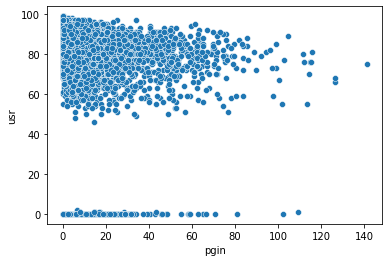

In [21]:
sns.scatterplot(x=df['pgin'],y=df['usr'])

<AxesSubplot:xlabel='ppgin', ylabel='usr'>

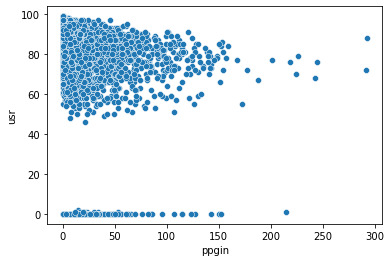

In [22]:
sns.scatterplot(x=df['ppgin'],y=df['usr'])

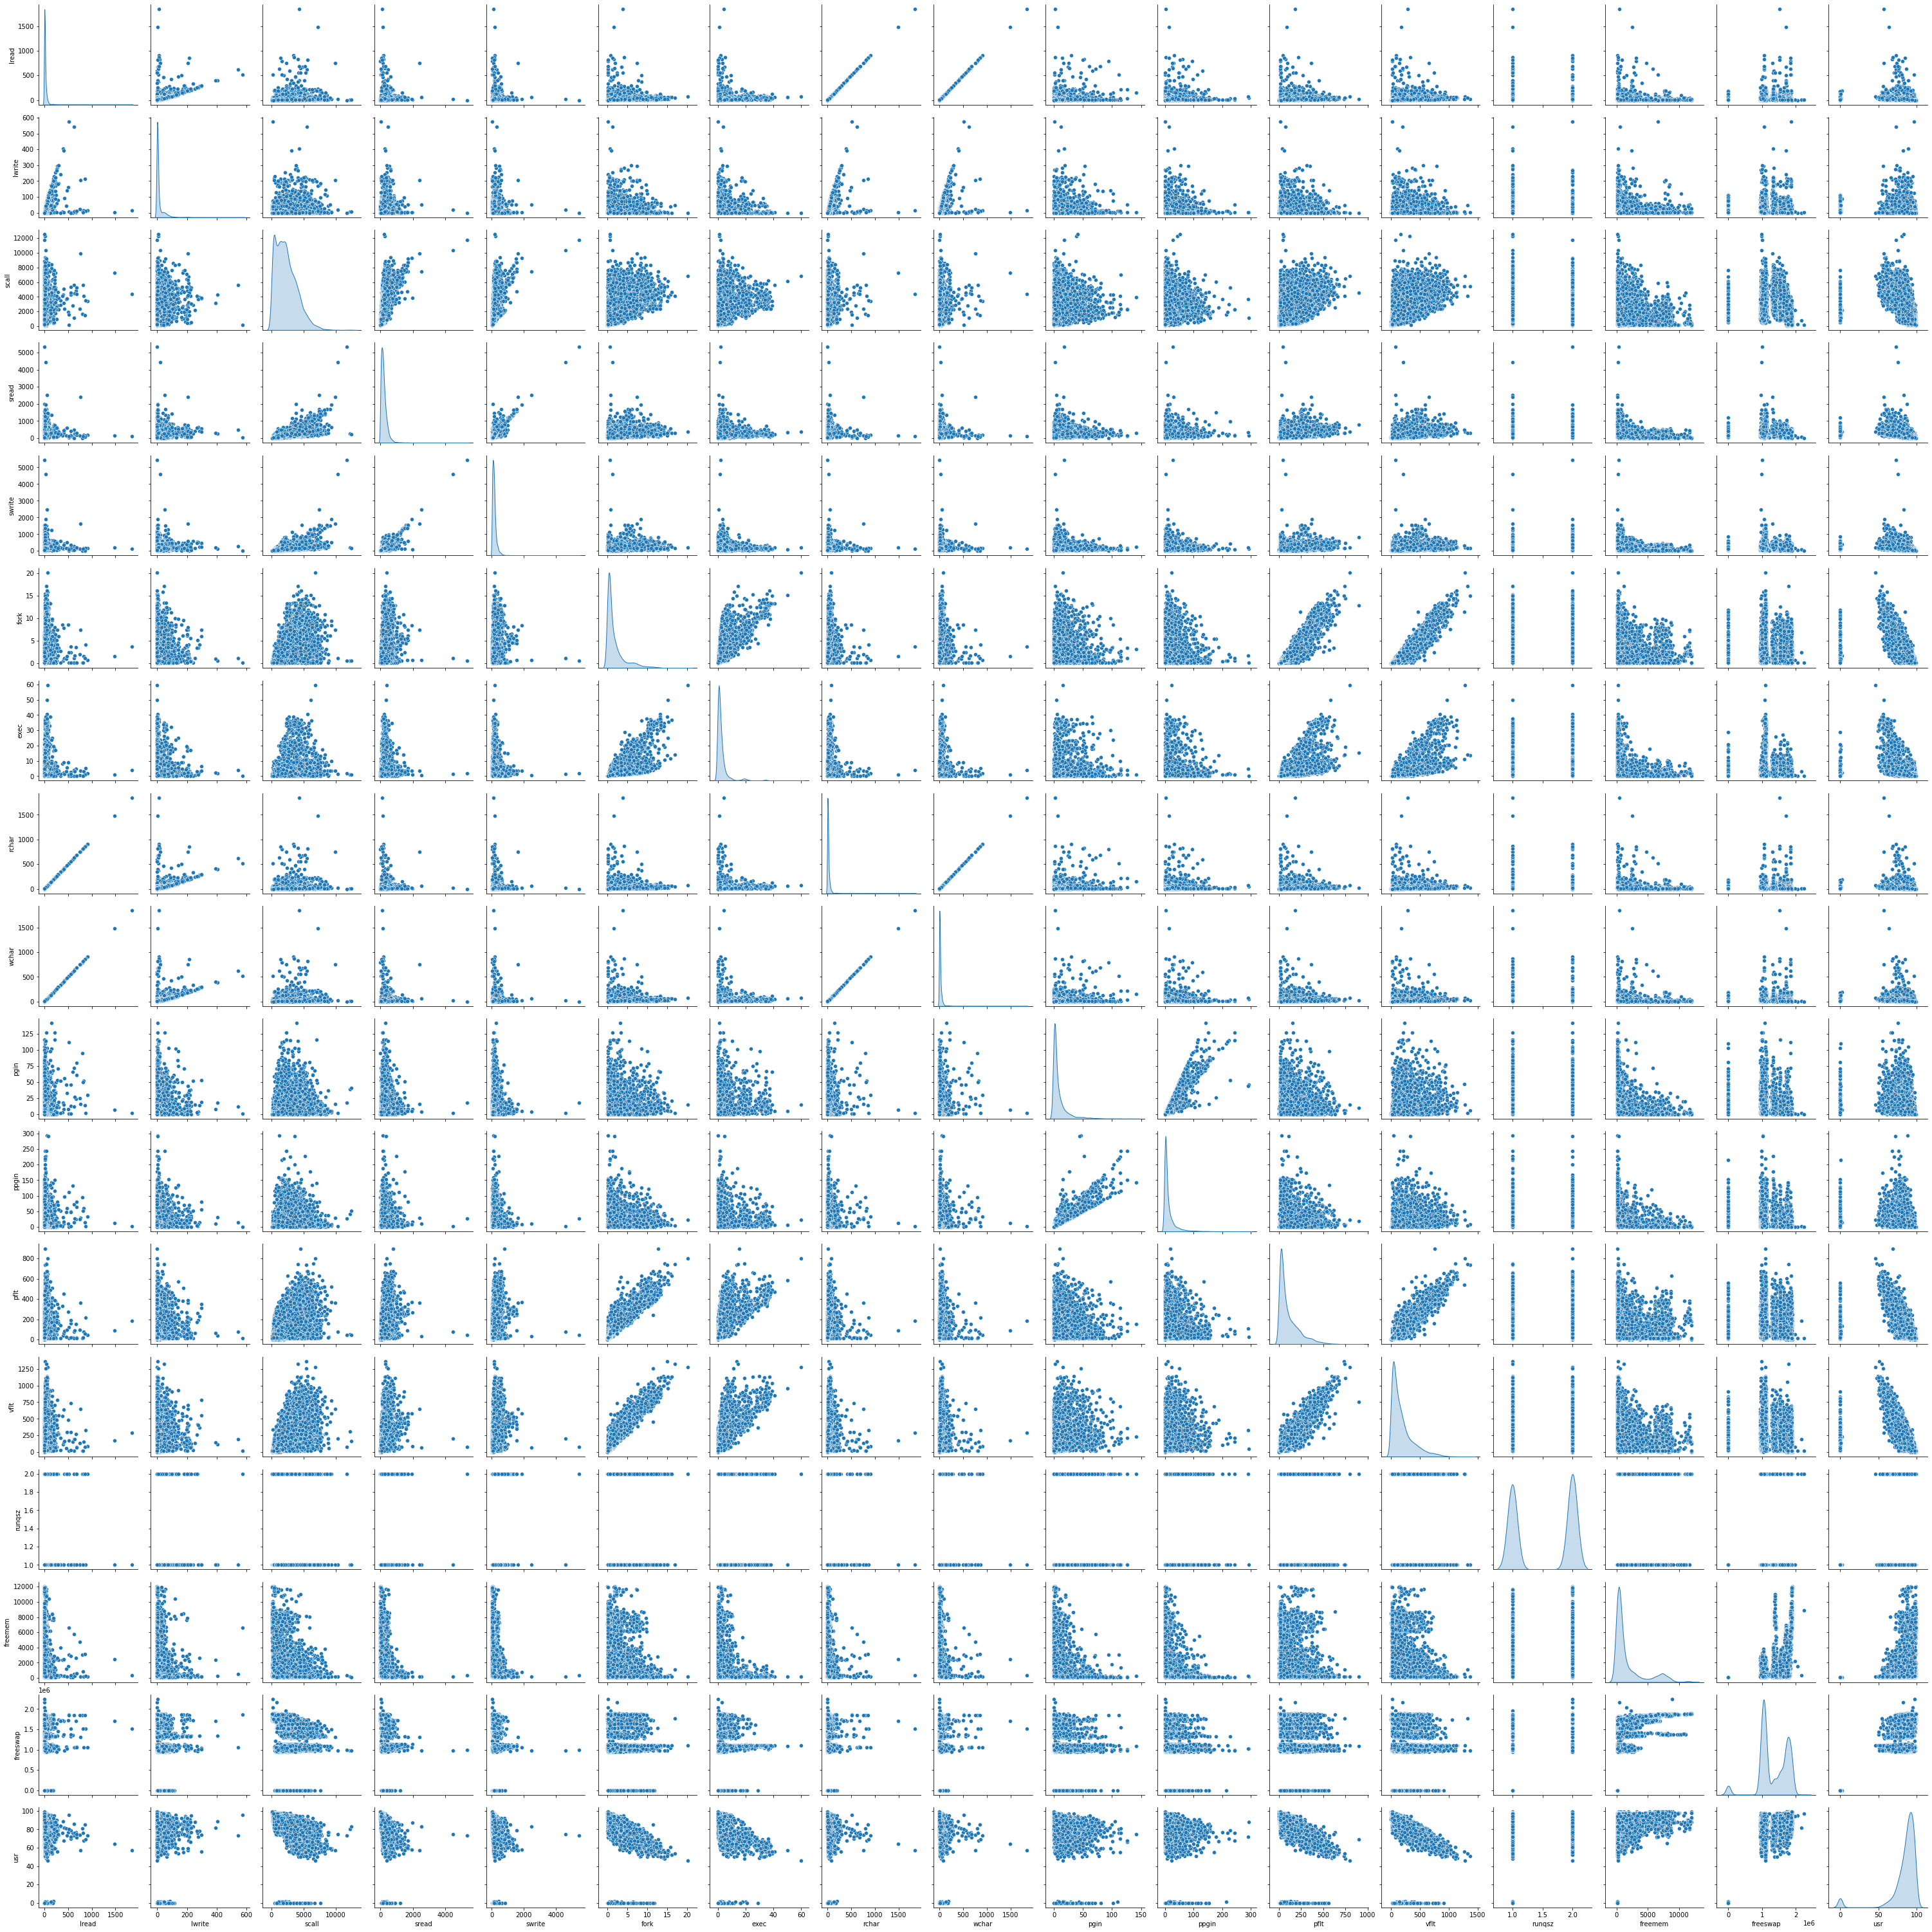

In [23]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

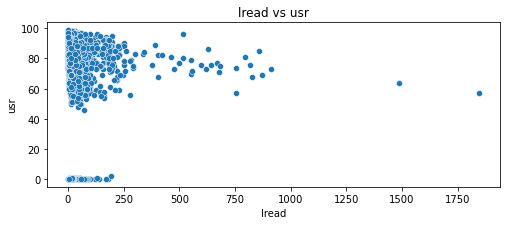

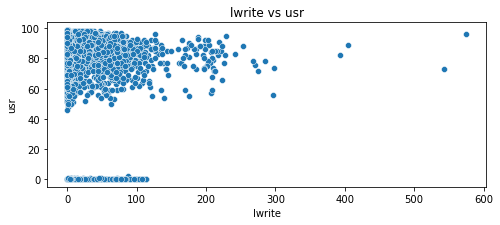

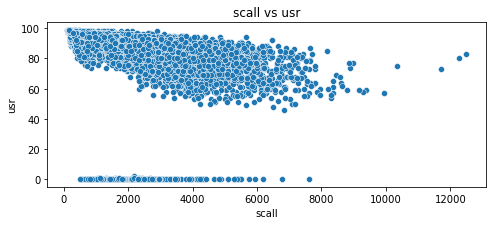

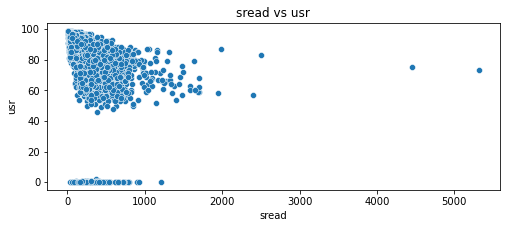

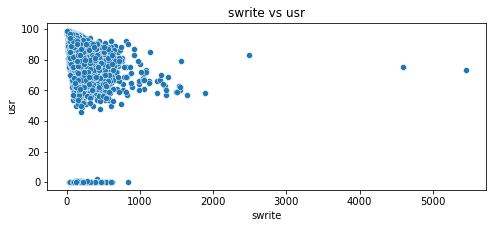

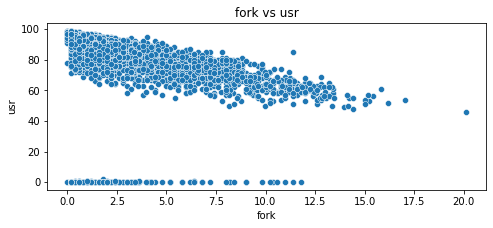

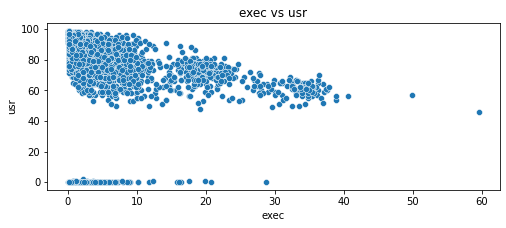

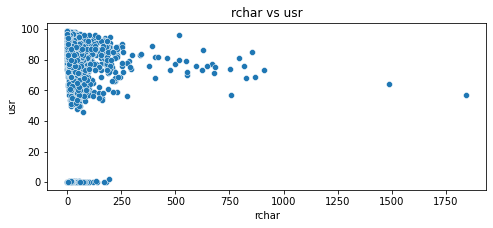

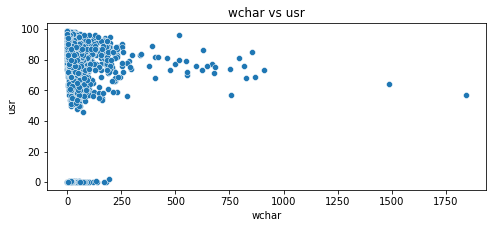

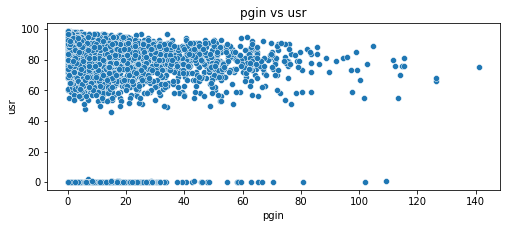

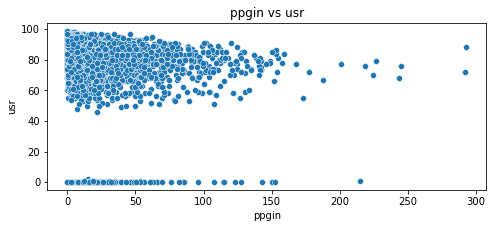

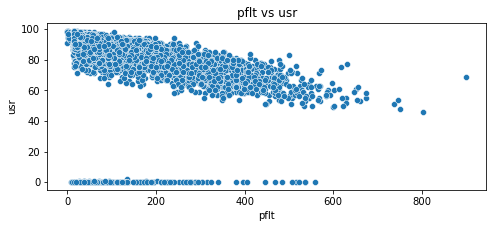

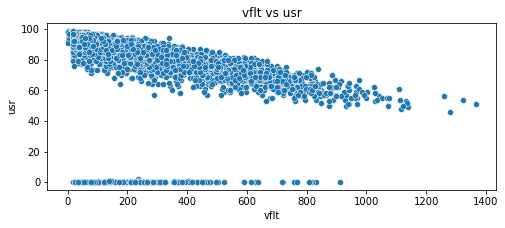

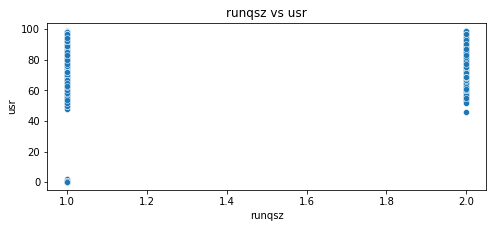

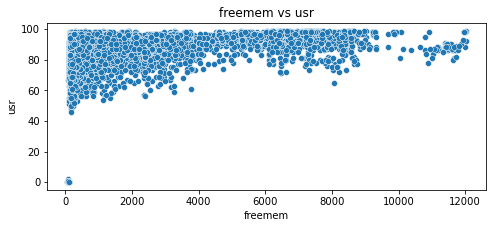

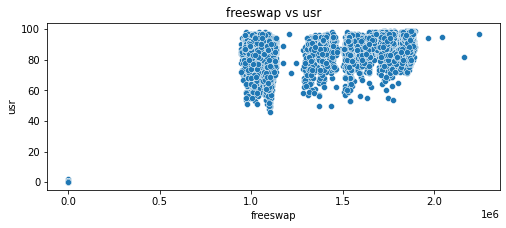

In [24]:
col = df.columns
for i in range(len(col)-1):
    plt.figure(figsize=(20,20))
    plt.subplot(7,3,i+1)
    sns.scatterplot(x=df[df.columns[i]],y=df['usr'])
    plt.title('{} vs usr'.format(df.columns[i]))
    plt.tight_layout()
    plt.show();

### TREATING OUTLIERS

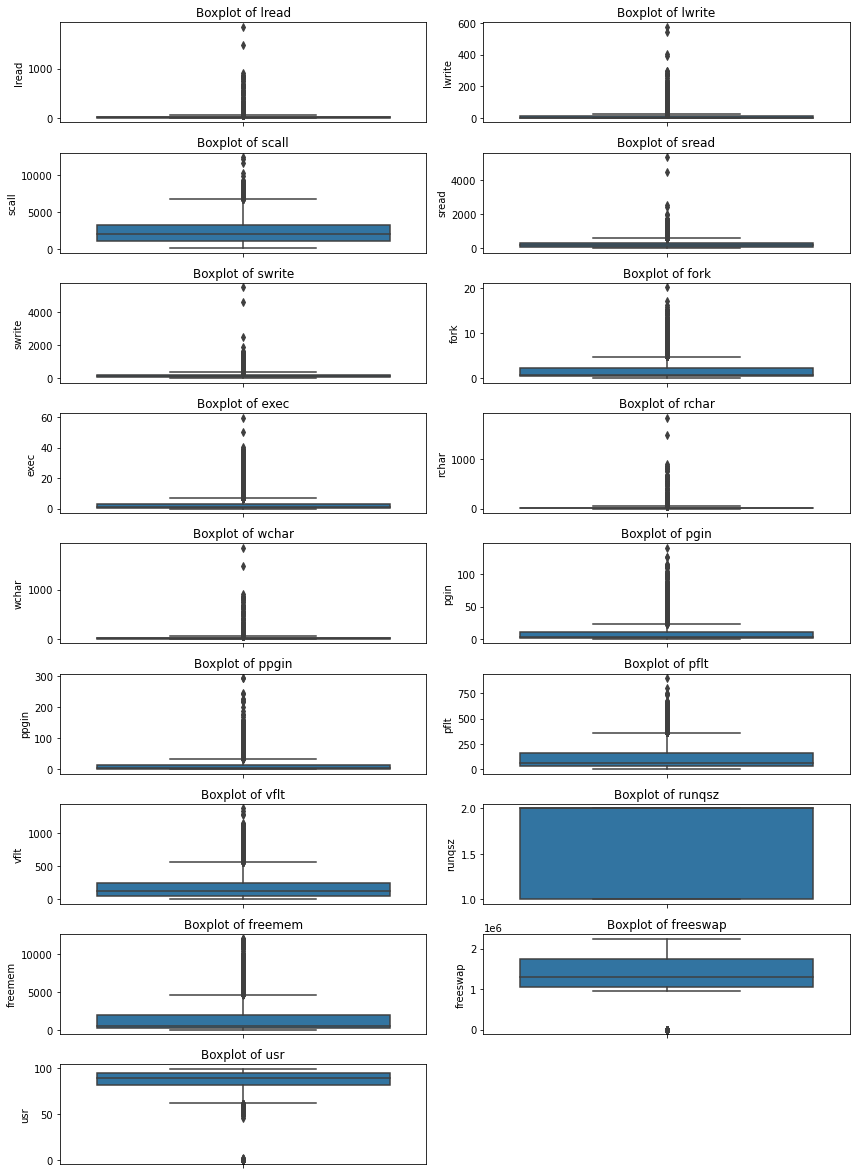

In [25]:
plt.figure(figsize=(12,20))
for i in range(len(df.columns)):
    plt.subplot(11,2,i+1)
    sns.boxplot(y=df[df.columns[i]]);
    plt.title('Boxplot of {}'.format(df.columns[i]))
    plt.tight_layout();

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [27]:
for column in df.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

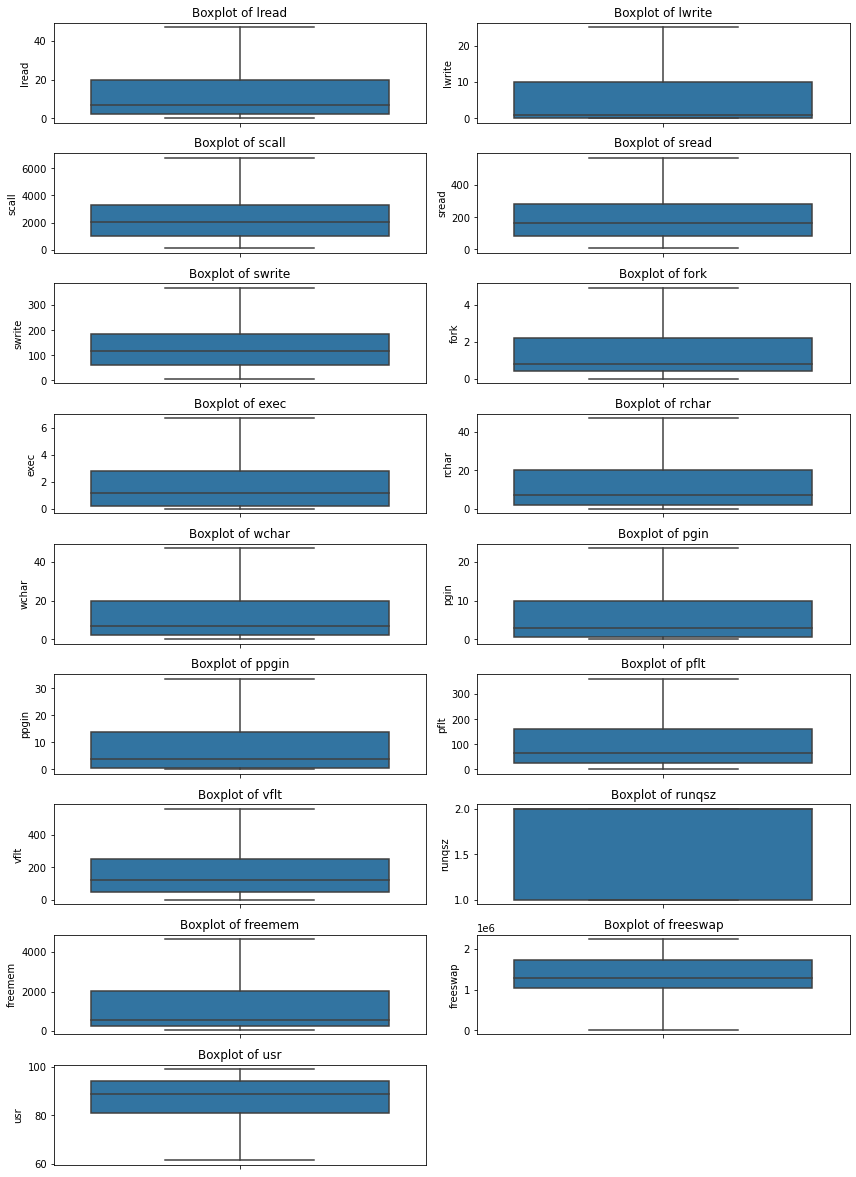

In [28]:
plt.figure(figsize=(12,20))
for i in range(len(df.columns)):
    plt.subplot(11,2,i+1)
    sns.boxplot(y=df[df.columns[i]]);
    plt.title('Boxplot of {}'.format(df.columns[i]))
    plt.tight_layout();

In [29]:
df.describe().T

count          mean            std      min        25%        50%  \
lread     8192.0  1.342285e+01      15.159741      0.0        2.0        7.0   
lwrite    8192.0  6.657471e+00       9.291945      0.0        0.0        1.0   
scall     8192.0  2.294484e+03    1593.093446    109.0     1012.0     2051.5   
sread     8192.0  1.997764e+02     146.758932      6.0       86.0      166.0   
swrite    8192.0  1.379700e+02      97.141835      7.0       63.0      117.0   
fork      8192.0  1.557771e+00       1.591220      0.0        0.4        0.8   
exec      8192.0  1.931495e+00       2.028253      0.0        0.2        1.2   
rchar     8192.0  1.342285e+01      15.159741      0.0        2.0        7.0   
wchar     8192.0  1.342285e+01      15.159741      0.0        2.0        7.0   
pgin      8192.0  6.385262e+00       7.684420      0.0        0.6        2.8   
ppgin     8192.0  9.140437e+00      11.160927      0.0        0.6        3.8   
pflt      8192.0  1.056361e+02     101.548788      0.0       25.0       63.8   
vflt      8192.0  1.756225e+02     162.497031      0.2       45.4      120.4   
runqsz    8192.0  1.528687e+00       0.499207      1.0        1.0        2.0   
freemem   8192.0  1.387625e+03    1605.763418     55.0      231.0      579.0   
freeswap  8192.0  1.328520e+06  420782.723746  10989.5  1042623.5  1289289.5   
usr       8192.0  8.624622e+01       9.748585     61.5       81.0       89.0   

                  75%           max  
lread          20.000  4.700000e+01  
lwrite         10.000  2.500000e+01  
scall        3317.250  6.775125e+03  
sread         279.000  5.685000e+02  
swrite        185.000  3.680000e+02  
fork            2.200  4.900000e+00  
exec            2.800  6.700000e+00  
rchar          20.000  4.700000e+01  
wchar          20.000  4.700000e+01  
pgin            9.765  2.351250e+01  
ppgin          13.800  3.360000e+01  
pflt          159.600  3.615000e+02  
vflt          251.800  5.614000e+02  
runqsz          2.000  2.000000e+00  
freemem      2002.250  4.659125e+03  
freeswap  1730379.500  2.243187e+06  
usr            94.000  9.900000e+01

### Univariate Analysis

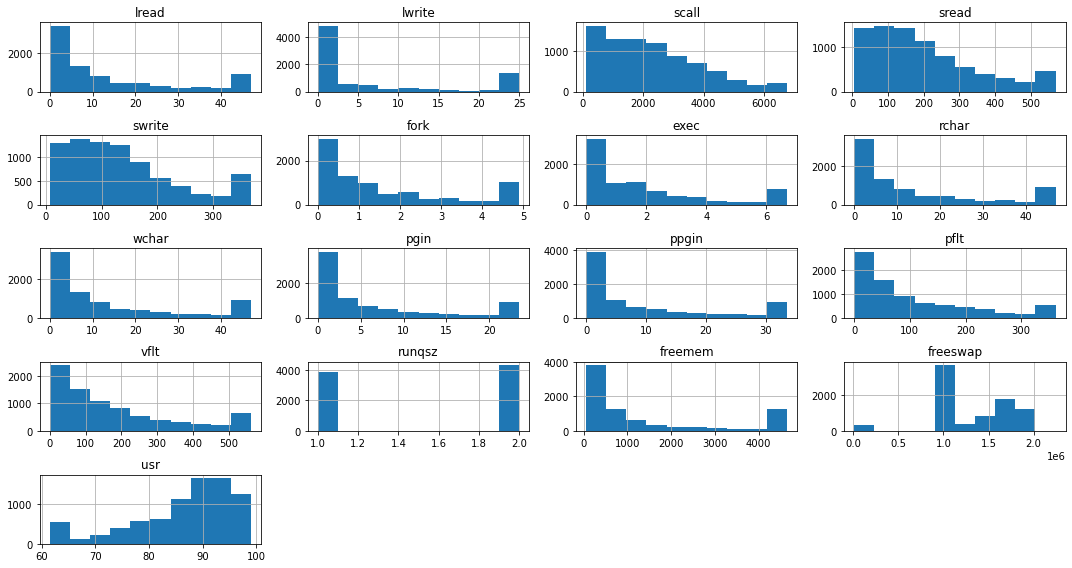

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.hist()
plt.tight_layout()

### Bivariate Analysis

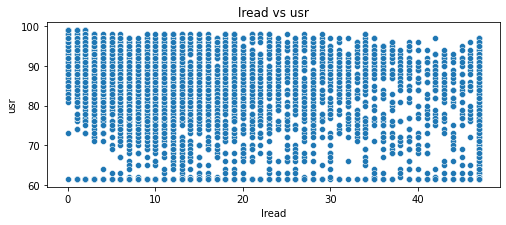

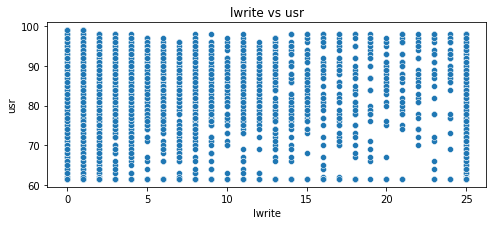

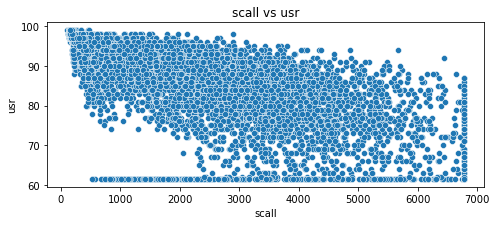

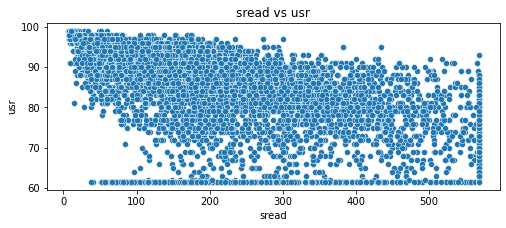

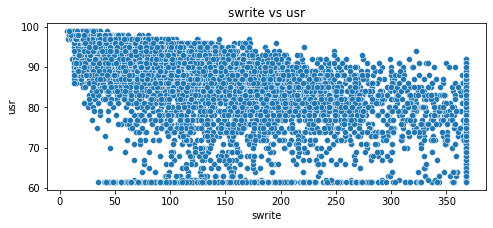

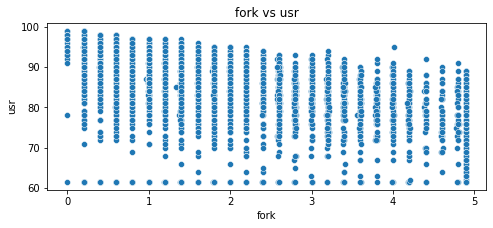

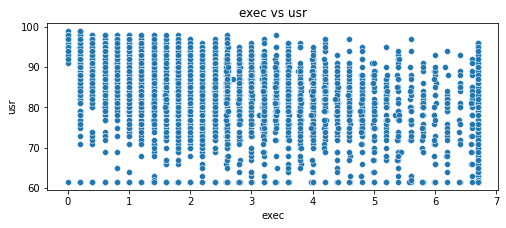

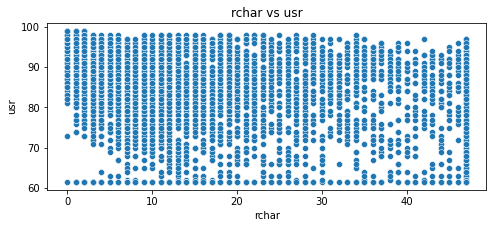

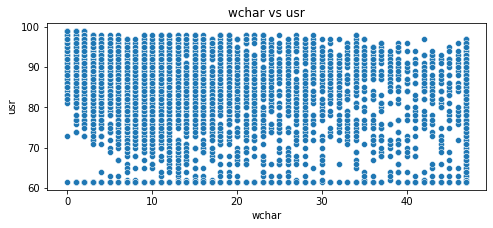

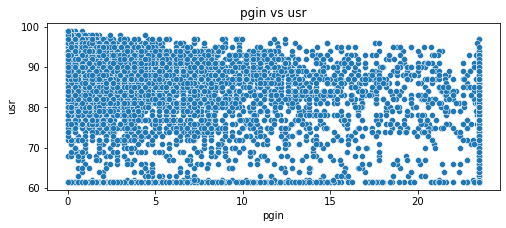

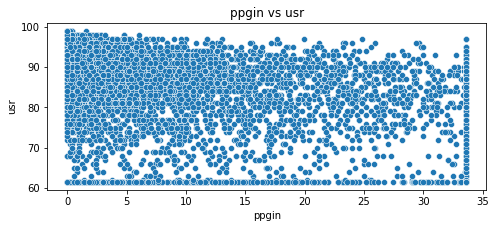

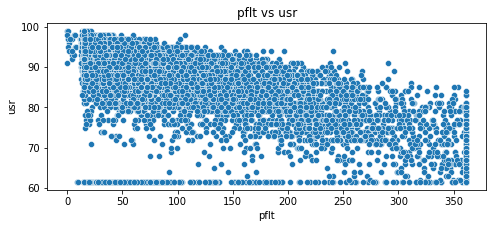

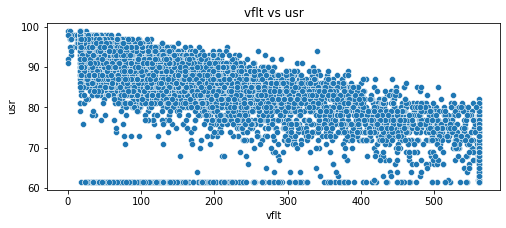

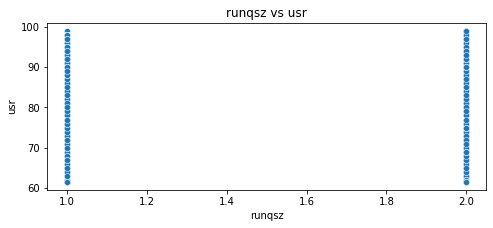

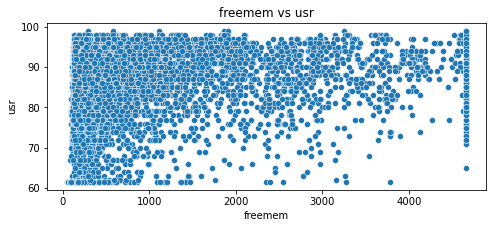

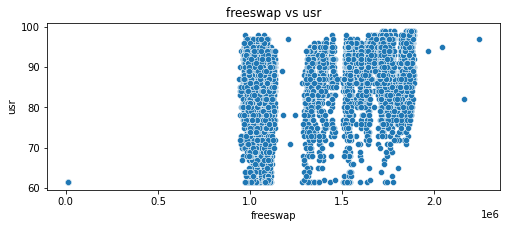

In [31]:
col = df.columns
for i in range(len(col)-1):
    plt.figure(figsize=(20,20))
    plt.subplot(7,3,i+1)
    sns.scatterplot(x=df[df.columns[i]],y=df['usr'])
    plt.title('{} vs usr'.format(df.columns[i]))
    plt.tight_layout()
    plt.show();

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   float64
 1   lwrite    8192 non-null   float64
 2   scall     8192 non-null   float64
 3   sread     8192 non-null   float64
 4   swrite    8192 non-null   float64
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgin      8192 non-null   float64
 10  ppgin     8192 non-null   float64
 11  pflt      8192 non-null   float64
 12  vflt      8192 non-null   float64
 13  runqsz    8192 non-null   float64
 14  freemem   8192 non-null   float64
 15  freeswap  8192 non-null   float64
 16  usr       8192 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


As the target variable is usr, i have done multivariate analysis with usr, to observe the relation with other variables

### Correlation

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [34]:
vif_data

feature        VIF
0      lread        inf
1     lwrite   6.405925
2      scall   8.948050
3      sread  14.976909
4     swrite  15.122597
5       fork  25.132010
6       exec   5.845961
7      rchar        inf
8      wchar        inf
9       pgin  22.996011
10     ppgin  22.367413
11      pflt  24.252724
12      vflt  31.835491
13    runqsz  11.777376
14   freemem   3.015082
15  freeswap  25.252725
16       usr  39.702640

* A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.
* A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.
* A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

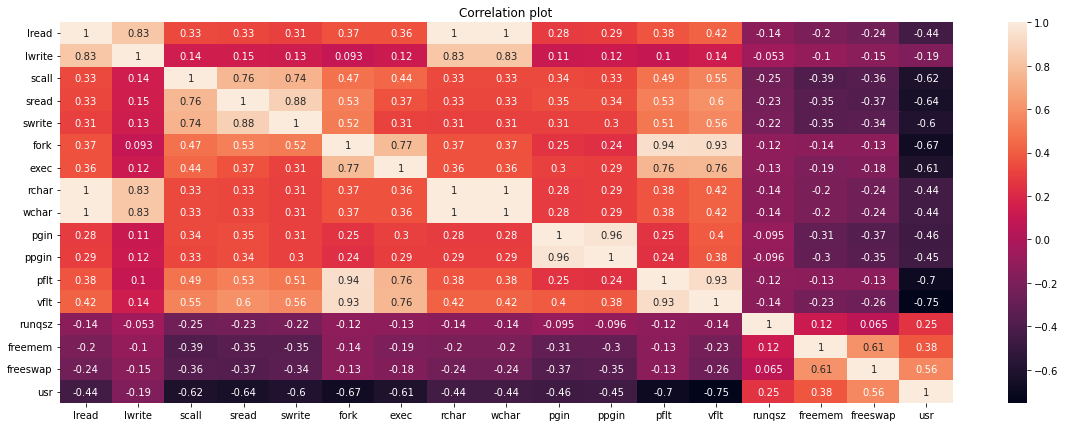

In [35]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation plot')
plt.show()

As there is much correlation between few variables, we can drop few.

PCA or variance inflation factor can be used but as there more than 90% correlation. We can drop these columns.

* lread, rchar, wchar have 100% correlation. Hence two of these variables can be dropped.
* vflt, pflt, fork has almost 94% correlation. Therefore two from these variables can also be dropped.
* pgscan, pgfree,ppgout has 92% correlation. So, two of these variables can be dropped.

For now lets only drop the columns with 100% correlation and check the models.

In [36]:
df=df.drop(['lread','wchar'],axis=1)

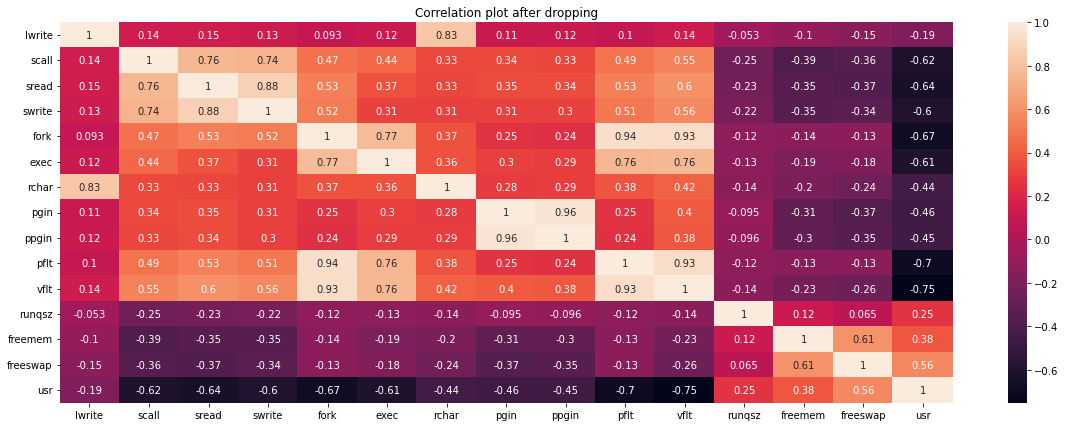

In [37]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation plot after dropping')
plt.show()


### Train-Test Split

In [38]:
y = df[['usr']]

Y is to store the dependent variable.

Here the dependent variable is 'usr'

In [39]:
x = df.drop('usr',axis=1)

x is to store the independent variables.

Here the independent variables are all the variables except 'usr' variable.

In [40]:
x.head()

lwrite   scall  sread  swrite  fork  exec  rchar  pgin  ppgin    pflt  \
0     0.0  2147.0   79.0    68.0   0.2   0.2    1.0   1.6    2.6   16.00   
1     0.0   170.0   18.0    21.0   0.2   0.2    0.0   0.0    0.0   15.63   
2     3.0  2162.0  159.0   119.0   2.0   2.4   15.0   6.0    9.4  150.20   
3     0.0   160.0   12.0    16.0   0.2   0.2    0.0   0.2    0.2   15.60   
4     1.0   330.0   39.0    38.0   0.4   0.4    5.0   1.0    1.2   37.80   

     vflt  runqsz   freemem   freeswap  
0   26.40     1.0  4659.125  1730946.0  
1   16.83     2.0  4659.125  1869002.0  
2  220.20     2.0   702.000  1021237.0  
3   16.80     2.0  4659.125  1863704.0  
4   47.60     2.0   633.000  1760253.0

### Import the required modules

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3 , random_state=101)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.transform(X_test)


In [43]:
col = X_train.columns
X_train = pd.DataFrame(columns=col,data = X_train1)
X_test = pd.DataFrame(data=X_test,columns=col)

### Fit the model

In [44]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

Find the bestfit model on training data

### The coefficients for independent variables

In [45]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for lwrite is 0.34085327849930164
The coefficient for scall is -0.9435322516067233
The coefficient for sread is -0.5263702673534896
The coefficient for swrite is -0.4464608377963798
The coefficient for fork is -0.1368899527172787
The coefficient for exec is -0.6545963100649146
The coefficient for rchar is -0.7320979718815326
The coefficient for pgin is 0.18454701240022367
The coefficient for ppgin is -1.184281518501472
The coefficient for pflt is -3.3379537741401286
The coefficient for vflt is -0.8950474064960594
The coefficient for runqsz is 0.9961245029635197
The coefficient for freemem is -0.7601747196066818
The coefficient for freeswap is 3.9011693979755147


In [46]:
regression_model.coef_

array([[ 0.34085328, -0.94353225, -0.52637027, -0.44646084, -0.13688995,
        -0.65459631, -0.73209797,  0.18454701, -1.18428152, -3.33795377,
        -0.89504741,  0.9961245 , -0.76017472,  3.9011694 ]])

### The intercept for the model

In [47]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 86.28313568189745


### R square on training data

In [48]:
regression_model.score(X_train, y_train)

0.7833945890936802

### R square on testing data

In [49]:
regression_model.score(X_test, y_test)

-304681233675.528

### RMSE on Training data

In [74]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.526822863487679

### RMSE on Testing data

In [77]:
predicted_test=regression_model.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.747476476083055

In [76]:
predicted_test

array([[4055162.36334842],
       [4103825.4507578 ],
       [5982015.29489146],
       ...,
       [6859060.30686785],
       [3953797.0658198 ],
       [4308053.61049937]])

### Linear Regression using statsmodels(OLS)

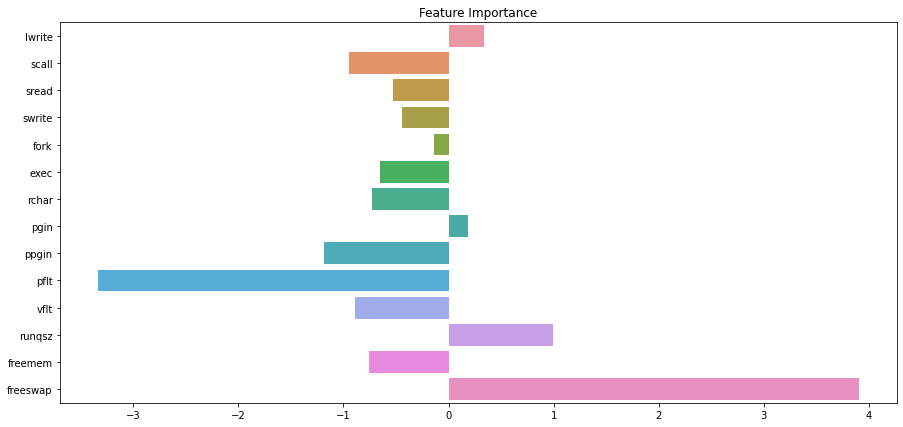

In [52]:
plt.figure(figsize=(15,7))
for i in range(len(regression_model.coef_)):
    abs(regression_model.coef_[i])
    sns.barplot(x=regression_model.coef_[i],y=X_train.columns)
    plt.title('Feature Importance')

In [53]:
regression_model.coef_

array([[ 0.34085328, -0.94353225, -0.52637027, -0.44646084, -0.13688995,
        -0.65459631, -0.73209797,  0.18454701, -1.18428152, -3.33795377,
        -0.89504741,  0.9961245 , -0.76017472,  3.9011694 ]])

In [54]:
import statsmodels.api as sm

In [55]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [56]:
y_train = y_train.reset_index(drop=True) 
X_train = X_train.reset_index(drop=True)


In [57]:
model = sm.OLS(y_train,X_train).fit()
model

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1477.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:07:04   Log-Likelihood:                -16795.
No. Observations:                5734   AIC:                         3.362e+04
Df Residuals:                    5719   BIC:                         3.372e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.2831      0.060   1441.426      0.000      86.166      86.400
lwrite         0.3409      0.123      2.763      0.006       0.099       0.583
scall         -0.9435      0.103     -9.137      0.000      -1.146      -0.741
sread         -0.5264      0.138     -3.815      0.000      -0.797      -0.256
swrite        -0.4465      0.134     -3.323      0.001      -0.710      -0.183
fork          -0.1369      0.214     -0.638      0.523      -0.557       0.283
exec          -0.6546      0.106     -6.172      0.000      -0.863      -0.447
rchar         -0.7321      0.137     -5.331      0.000      -1.001      -0.463
pgin           0.1845      0.226      0.816      0.414      -0.259       0.628
ppgin         -1.1843      0.225     -5.268      0.000      -1.625      -0.744
pflt          -3.3380      0.204    -16.374      0.000      -3.738      -2.938
vflt          -0.8950      0.232     -3.851      0.000      -1.351      -0.439
runqsz         0.9961      0.062     15.942      0.000       0.874       1.119
freemem       -0.7602      0.079     -9.658      0.000      -0.914      -0.606
freeswap       3.9012      0.081     48.170      0.000       3.742       4.060
==============================================================================
Omnibus:                      980.654   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1939.276
Skew:                          -1.038   Prob(JB):                         0.00
Kurtosis:                       4.951   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The predicted R-squared, is used to indicate how well a regression model predicts responses for new observations.

Adjusted R-squared, a modified version of R-squared, adds precision and reliability by considering the impact of additional independent variables that tend to skew the results of R-squared measurements.

The P-value is a statistical number to conclude if there is a relationship between variables.

* A low P-value (< 0.05) means that the coefficient is likely not to equal zero.
* A high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable (here: if Average_Pulse affects Calorie_Burnage).
* A high P-value is also called an insignificant P-value.


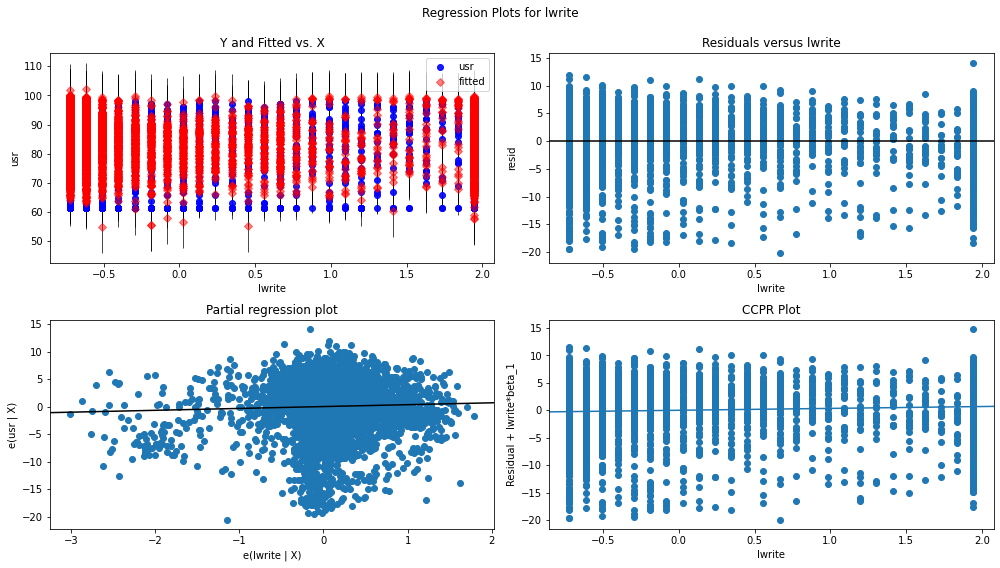

In [81]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model,'lwrite',fig=fig)

The adjusted R square and R square are almost similar.

### Calculate MSE on train

In [59]:
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)

### Calculate RMSE on train 

In [60]:
np.sqrt(mse)

4.526822863487679

In [61]:
y_pred = model.predict(X_test)

In [82]:
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse)

5407896.032776746

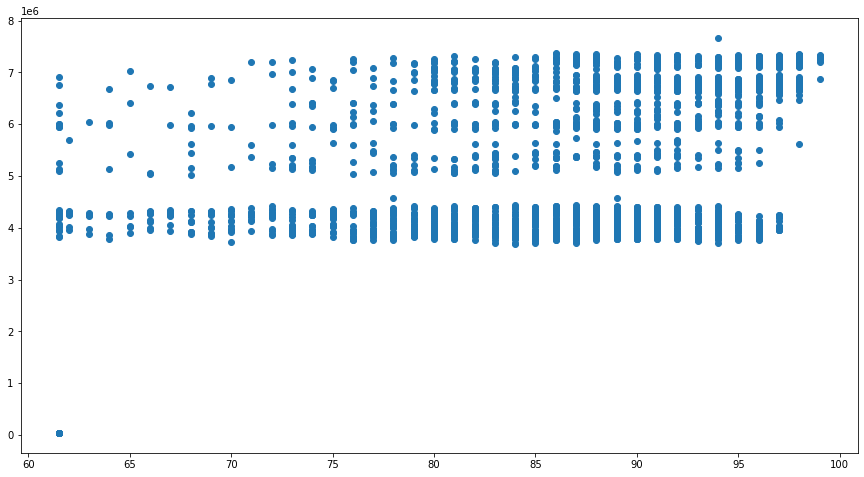

In [83]:
plt.scatter(y_test, y_pred)
plt.show()

In [64]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,3),i),end=' ')

(86.283) * const + (0.341) * lwrite + (-0.944) * scall + (-0.526) * sread + (-0.446) * swrite + (-0.137) * fork + (-0.655) * exec + (-0.732) * rchar + (0.185) * pgin + (-1.184) * ppgin + (-3.338) * pflt + (-0.895) * vflt + (0.996) * runqsz + (-0.76) * freemem + (3.901) * freeswap + 

## The Linear regression equation for first is :

**usr = b0 * const + b1 * lwrite + b2 * scall + b3 * sread + b4 * swrite + b5 * fork + b6 * exec + b7 * rchar + b8 * pgin + b9 * ppgin + b10 * pflt + b11 * vflt + b12 * runqsz + b13 * freemem + b14 * freeswap**


**usr = (86.283) * const + (0.341) * lwrite + (-0.944) * scall + (-0.526) * sread + (-0.446) * swrite + (-0.137) * fork + (-0.655) * exec + (-0.732) * rchar + (0.185) * pgin + (-1.184) * ppgin + (-3.338) * pflt + (-0.895) * vflt + (0.996) * runqsz + (-0.76) * freemem + (3.901) * freeswap**


This model explains 78% of the data, but there are variables which are insignificant.


### MODEL2


How to Interpret P-values and Coefficients in Regression Analysis



P values and coefficients in regression analysis work together to tell you which relationships in your model are statistically significant and the nature of those relationships. The linear regression coefficients describe the mathematical relationship between each independent variable and the dependent variable. The p values for the coefficients indicate whether these relationships are statistically significant.


Interpreting P Values in Regression for Variables:

The p values in regression help determine whether the relationships that you observe in your sample also exist in the larger population. 

The linear regression p value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. 

If there is no correlation, there is no association between the changes in the independent variable and the shifts in the dependent variable. In other words, there is insufficient evidence to conclude that there is an effect at the population level.

If the p-value for a variable is less than your significance level, your sample data provide enough evidence to reject the null hypothesis for the entire population

We could see that the p values is high for fork that is, this variable has no significance. SO, for model2 we can drop this variable and check the model.

In [65]:
df_m2 = df.drop(['pgin'],axis=1)

In [66]:
df_m2.columns

Index(['lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

### Split Data

In [204]:
x_m2 = df_m2.drop(['usr'],axis=1)
y_m2 = df_m2['usr']

In [205]:
x_m2

lwrite   scall  sread  swrite  fork  exec  rchar  ppgin    pflt    vflt  \
0        0.0  2147.0   79.0    68.0   0.2  0.20    1.0   2.60   16.00   26.40   
1        0.0   170.0   18.0    21.0   0.2  0.20    0.0   0.00   15.63   16.83   
2        3.0  2162.0  159.0   119.0   2.0  2.40   15.0   9.40  150.20  220.20   
3        0.0   160.0   12.0    16.0   0.2  0.20    0.0   0.20   15.60   16.80   
4        1.0   330.0   39.0    38.0   0.4  0.40    5.0   1.20   37.80   47.60   
...      ...     ...    ...     ...   ...   ...    ...    ...     ...     ...   
8187    12.0  3009.0  360.0   244.0   1.6  5.81   16.0  33.60  139.28  270.74   
8188     0.0  1596.0  170.0   146.0   2.4  1.80    4.0   4.40  122.40  212.60   
8189     5.0  3116.0  289.0   190.0   0.6  0.60   16.0  33.60   60.20  219.80   
8190    25.0  5180.0  254.0   179.0   1.2  1.20   32.0  24.25   93.19  202.81   
8191     0.0   985.0   55.0    46.0   1.6  4.80    2.0   6.20   91.80  110.00   

      runqsz   freemem   freeswap  
0        1.0  4659.125  1730946.0  
1        2.0  4659.125  1869002.0  
2        2.0   702.000  1021237.0  
3        2.0  4659.125  1863704.0  
4        2.0   633.000  1760253.0  
...      ...       ...        ...  
8187     1.0   387.000   986647.0  
8188     2.0   263.000  1055742.0  
8189     2.0   400.000   969106.0  
8190     1.0   141.000  1022458.0  
8191     1.0   659.000  1756514.0  

[8192 rows x 13 columns]

In [206]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(x_m2, y_m2, test_size=0.3 , random_state=101)

### Scale the data

In [207]:
from sklearn.preprocessing import StandardScaler
scalr_2=StandardScaler()
X2_train1=scalr_2.fit_transform(X2_train)
X2_test1=scalr_2.transform(X2_test)

In [208]:
column = X2_train.columns
X2_train = pd.DataFrame(data=X2_train1,columns=column)
X2_test = pd.DataFrame(data=X2_test1,columns=column)


### Fit the data

In [209]:
regression_model2 = LinearRegression()
regression_model2.fit(X2_train, y2_train)

LinearRegression()

In [210]:
for idx, col_name in enumerate(X2_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[idx]))

The coefficient for lwrite is 0.34292610339344587
The coefficient for scall is -0.9398370543156991
The coefficient for sread is -0.5319971370792035
The coefficient for swrite is -0.44435208606822335
The coefficient for fork is -0.139335759126436
The coefficient for exec is -0.6516747302862193
The coefficient for rchar is -0.7366078638789414
The coefficient for ppgin is -1.0109140779548014
The coefficient for pflt is -3.3483407304567794
The coefficient for vflt is -0.878714964154981
The coefficient for runqsz is 0.9964990227416161
The coefficient for freemem is -0.7604369393331962
The coefficient for freeswap is 3.8967274389116224


In [211]:
intercept = regression_model2.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 86.28313568189745


In [212]:
regression_model2.intercept_

86.28313568189745

In [213]:
regression_model2.coef_

array([ 0.3429261 , -0.93983705, -0.53199714, -0.44435209, -0.13933576,
       -0.65167473, -0.73660786, -1.01091408, -3.34834073, -0.87871496,
        0.99649902, -0.76043694,  3.89672744])

In [193]:
 X2_train.columns.drop

Index(['const', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [111]:
regression_model2.score(X2_train, y2_train)

0.7833693502422308

In [112]:
regression_model2.score(X2_test, y2_test)

0.7635272738255096

### RMSE for train data

In [104]:
predicted_train2=regression_model1.fit(X2_train, y2_train).predict(X2_train)
np.sqrt(metrics.mean_squared_error(y2_train,predicted_train2))

4.527086588390374

### RMSE for test data

In [132]:
predicted_test2=regression_model.fit(X2_test, y2_test).predict(X2_test)
np.sqrt(metrics.mean_squared_error(y2_test,predicted_test2))

4.750199071173397

In [133]:
y2_train = y_train.reset_index(drop=True) 
X2_train = X_train.reset_index(drop=True)


In [134]:
X2_train=X2_train.drop('pgin',axis=1)

In [135]:
X2_train.columns

Index(['const', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [136]:
X2_test.columns

Index(['const', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

### OLS MODEL

In [137]:
import statsmodels.api as sm
X2_train=sm.add_constant(X2_train)
X2_test=sm.add_constant(X2_test)
model2 = sm.OLS(y2_train, X2_train).fit()
model2

In [139]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1591.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:16:48   Log-Likelihood:                -16795.
No. Observations:                5734   AIC:                         3.362e+04
Df Residuals:                    5720   BIC:                         3.371e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.2831      0.060   1441.468      0.000      86.166      86.400
lwrite         0.3429      0.123      2.781      0.005       0.101       0.585
scall         -0.9398      0.103     -9.110      0.000      -1.142      -0.738
sread         -0.5320      0.138     -3.861      0.000      -0.802      -0.262
swrite        -0.4444      0.134     -3.309      0.001      -0.708      -0.181
fork          -0.1393      0.214     -0.650      0.516      -0.560       0.281
exec          -0.6517      0.106     -6.148      0.000      -0.859      -0.444
rchar         -0.7366      0.137     -5.369      0.000      -1.006      -0.468
ppgin         -1.0109      0.074    -13.705      0.000      -1.156      -0.866
pflt          -3.3483      0.203    -16.458      0.000      -3.747      -2.949
vflt          -0.8787      0.232     -3.795      0.000      -1.333      -0.425
runqsz         0.9965      0.062     15.949      0.000       0.874       1.119
freemem       -0.7604      0.079     -9.662      0.000      -0.915      -0.606
freeswap       3.8967      0.081     48.225      0.000       3.738       4.055
==============================================================================
Omnibus:                      980.058   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1937.829
Skew:                          -1.038   Prob(JB):                         0.00
Kurtosis:                       4.951   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Feature Importance')

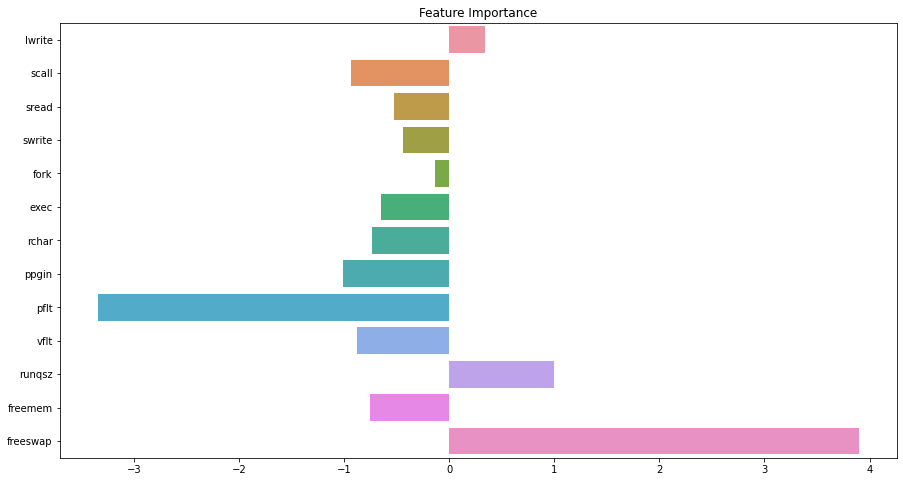

In [214]:
sns.barplot(x=regression_model2.coef_,y=X2_train.columns)
plt.title('Feature Importance')

In [146]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,3),i),end=' ')

(86.283) * const + (0.341) * lwrite + (-0.944) * scall + (-0.526) * sread + (-0.446) * swrite + (-0.137) * fork + (-0.655) * exec + (-0.732) * rchar + (0.185) * pgin + (-1.184) * ppgin + (-3.338) * pflt + (-0.895) * vflt + (0.996) * runqsz + (-0.76) * freemem + (3.901) * freeswap + 

## MODEL 3

In [150]:
df_m3 = df.drop(['fork','pgin'],axis=1)

In [151]:
df_m3.head()

lwrite   scall  sread  swrite  exec  rchar  ppgin    pflt    vflt  runqsz  \
0     0.0  2147.0   79.0    68.0   0.2    1.0    2.6   16.00   26.40     1.0   
1     0.0   170.0   18.0    21.0   0.2    0.0    0.0   15.63   16.83     2.0   
2     3.0  2162.0  159.0   119.0   2.4   15.0    9.4  150.20  220.20     2.0   
3     0.0   160.0   12.0    16.0   0.2    0.0    0.2   15.60   16.80     2.0   
4     1.0   330.0   39.0    38.0   0.4    5.0    1.2   37.80   47.60     2.0   

    freemem   freeswap   usr  
0  4659.125  1730946.0  95.0  
1  4659.125  1869002.0  97.0  
2   702.000  1021237.0  87.0  
3  4659.125  1863704.0  98.0  
4   633.000  1760253.0  90.0

### Split the data

In [152]:
y3=df_m3['usr']

In [153]:
x3 = df_m3.drop('usr',axis=1)

In [154]:
x3.head()

lwrite   scall  sread  swrite  exec  rchar  ppgin    pflt    vflt  runqsz  \
0     0.0  2147.0   79.0    68.0   0.2    1.0    2.6   16.00   26.40     1.0   
1     0.0   170.0   18.0    21.0   0.2    0.0    0.0   15.63   16.83     2.0   
2     3.0  2162.0  159.0   119.0   2.4   15.0    9.4  150.20  220.20     2.0   
3     0.0   160.0   12.0    16.0   0.2    0.0    0.2   15.60   16.80     2.0   
4     1.0   330.0   39.0    38.0   0.4    5.0    1.2   37.80   47.60     2.0   

    freemem   freeswap  
0  4659.125  1730946.0  
1  4659.125  1869002.0  
2   702.000  1021237.0  
3  4659.125  1863704.0  
4   633.000  1760253.0

In [155]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3 , random_state=101)

### Scale the data

In [156]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X3_train1 = scale.fit_transform(X3_train)
X3_test1 = scale.transform(X3_test)

In [157]:
X3_train.columns

Index(['lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar', 'ppgin', 'pflt',
       'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [158]:
col= X3_train.columns
X3_train = pd.DataFrame(data = X3_train1, columns = col)
X3_test = pd.DataFrame(data = X3_test1, columns = col)

### Fit the data

In [171]:
regression_model3 = LinearRegression()
regression_model3.fit(X3_train, y3_train)

LinearRegression()

In [172]:
for idx, col_name in enumerate(X3_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model3.coef_[idx]))

The coefficient for const is 0.0
The coefficient for lwrite is 0.346203700349855
The coefficient for scall is -0.9310979107797441
The coefficient for sread is -0.5257120680846054
The coefficient for swrite is -0.46106940807339886
The coefficient for exec is -0.6704107185181555
The coefficient for rchar is -0.7379889227275552
The coefficient for ppgin is -1.0005454598931824
The coefficient for pflt is -3.399543604839898
The coefficient for vflt is -0.9514568760092765
The coefficient for runqsz is 0.9963897349796311
The coefficient for freemem is -0.7619198413606646
The coefficient for freeswap is 3.8909444764080776


In [173]:
X3_test1

array([[-0.72187438,  1.18700157,  1.26016288, ...,  0.94104408,
         1.279711  , -0.69445083],
       [-0.6152125 ,  0.79651777, -0.02592537, ...,  0.94104408,
        -0.75463315, -0.66692707],
       [-0.50855062, -0.5117913 , -0.65528771, ..., -1.06264948,
        -0.47911666,  0.48247264],
       ...,
       [ 1.94467271, -0.85707441, -0.7989465 , ..., -1.06264948,
        -0.22972136,  1.0191132 ],
       [ 0.77139199,  0.40854512, -0.83315098, ..., -1.06264948,
        -0.71669521, -0.75876772],
       [ 1.94467271, -0.49484104, -0.58687876, ...,  0.94104408,
        -0.55126093, -0.54258874]])

In [174]:
regression_model3.score(X3_train, y3_train)

0.7833533527697085

In [175]:
regression_model3.score(X3_test, y3_test)

0.7636462033277122

### RMSE for train data

In [162]:
predicted_train3=regression_model3.fit(X3_train, y3_train).predict(X3_train)
np.sqrt(metrics.mean_squared_error(y3_train,predicted_train3))

4.5272537406525375

### RMSE for test data

In [163]:
predicted_test3=regression_model3.fit(X3_test, y3_test).predict(X3_test)
np.sqrt(metrics.mean_squared_error(y3_test,predicted_test3))

4.7524186033141556

In [164]:
predicted_test3

array([80.9549927 , 89.52673139, 88.48727344, ..., 95.96959816,
       81.16076326, 83.21902975])

In [165]:
X3_train.columns

Index(['lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar', 'ppgin', 'pflt',
       'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [166]:
X3_test.columns

Index(['lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar', 'ppgin', 'pflt',
       'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [167]:
y3_train = y3_train.reset_index(drop=True) 
X3_train = X3_train.reset_index(drop=True)

# X3_train.drop(['rchar','fork'],axis=1)

### OLS MODEL

In [168]:
# import statsmodels.api as sm
X3_train=sm.add_constant(X3_train)
X3_test=sm.add_constant(X3_test)
model3 = sm.OLS(y3_train,X3_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1724.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:26:04   Log-Likelihood:                -16795.
No. Observations:                5734   AIC:                         3.362e+04
Df Residuals:                    5721   BIC:                         3.370e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.2831      0.060   1441.541      0.000      86.166      86.400
lwrite         0.3462      0.123      2.810      0.005       0.105       0.588
scall         -0.9311      0.102     -9.103      0.000      -1.132      -0.731
sread         -0.5257      0.137     -3.825      0.000      -0.795      -0.256
swrite        -0.4611      0.132     -3.498      0.000      -0.719      -0.203
exec          -0.6704      0.102     -6.573      0.000      -0.870      -0.470
rchar         -0.7380      0.137     -5.380      0.000      -1.007      -0.469
ppgin         -1.0005      0.072    -13.894      0.000      -1.142      -0.859
pflt          -3.3995      0.188    -18.124      0.000      -3.767      -3.032
vflt          -0.9515      0.203     -4.693      0.000      -1.349      -0.554
runqsz         0.9964      0.062     15.948      0.000       0.874       1.119
freemem       -0.7619      0.079     -9.686      0.000      -0.916      -0.608
freeswap       3.8909      0.080     48.451      0.000       3.734       4.048
==============================================================================
Omnibus:                      981.220   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1946.591
Skew:                          -1.037   Prob(JB):                         0.00
Kurtosis:                       4.961   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Feature Importance')

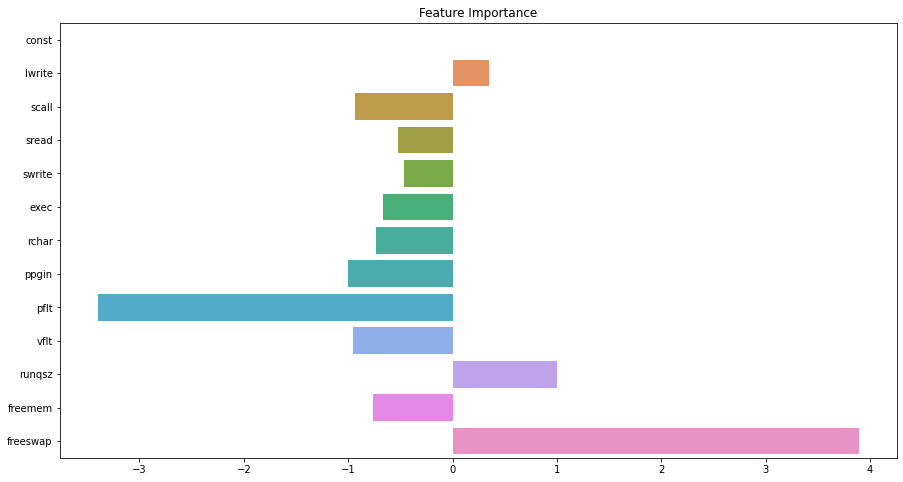

In [186]:
sns.barplot(x=regression_model3.coef_,y=X3_train.columns)
plt.title('Feature Importance')

In [183]:
regression_model3.coef_[2]

-0.9310979107797441

In [331]:
for i,j in np.array(model3.params.reset_index()):
    print('({}) * {} +'.format(round(j,3),i),end=' ')

(86.283) * const + (0.346) * lwrite + (-0.931) * scall + (-0.526) * sread + (-0.461) * swrite + (-0.67) * exec + (-0.738) * rchar + (-1.001) * ppgin + (-3.4) * pflt + (-0.951) * vflt + (0.996) * runqsz + (-0.762) * freemem + (3.891) * freeswap + 

### Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

In [215]:
df1 = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [216]:
df1.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [217]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [218]:
df1.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [219]:
df1.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

### Dupicate Values

In [ ]:
dups=df1.duplicated()
df1[dups]

Here we can not remove the duplicate values as there is no specific identity to tell exactly they are duplicate values.

### Null Values

In [221]:
df1.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [222]:
df1['Wife_age'] = df1['Wife_age'].fillna(df1['Wife_age'].median())
df1['No_of_children_born'] = df1['No_of_children_born'].fillna(df1['No_of_children_born'].median())

In [223]:
df1['No_of_children_born'] = df1['No_of_children_born'].replace(8.5,9)

In [224]:
df1.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

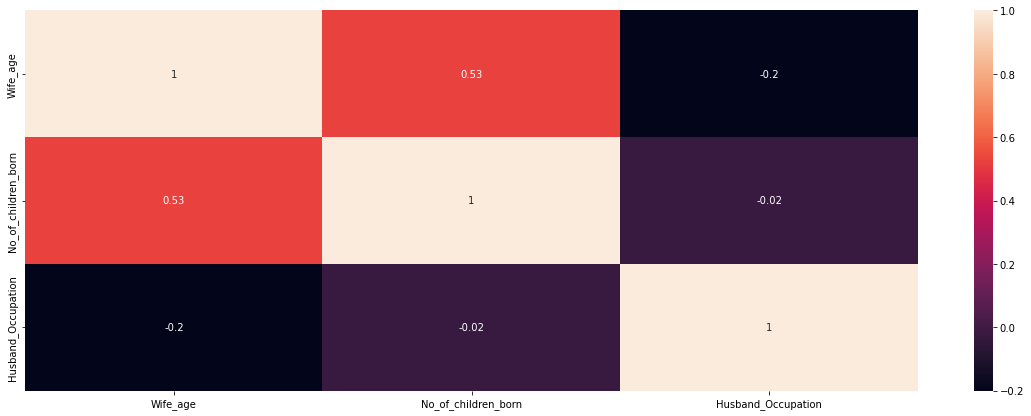

In [225]:
plt.figure(figsize=(20,7))
sns.heatmap(df1.corr(),annot=True)
plt.show()


There is no correlation between variables

### Outlier Treatment

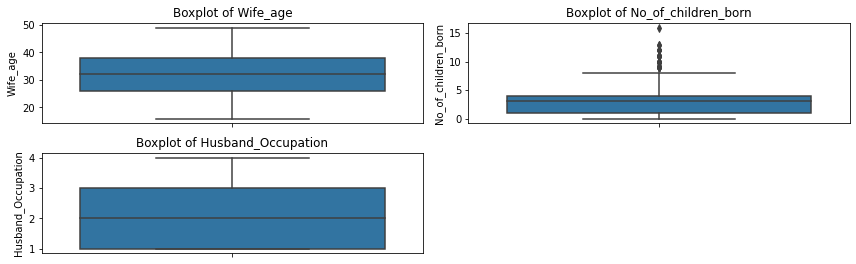

In [226]:
col=df1.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(12,20))
for i in range(len(col)):
    plt.subplot(11,2,i+1)
    sns.boxplot(y=df1[col[i]]);
    plt.title('Boxplot of {}'.format(col[i]))
    plt.tight_layout();
    

In [227]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [228]:
for column in col:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

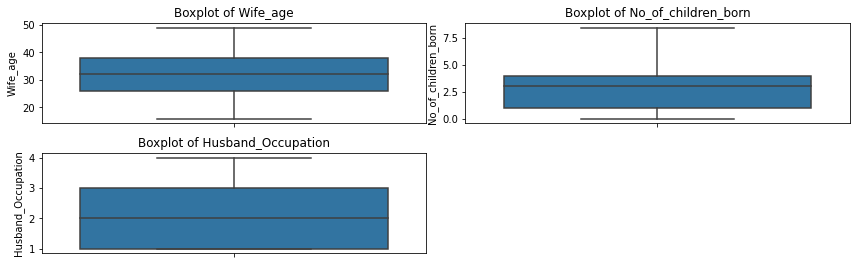

In [229]:
plt.figure(figsize=(12,20))
for i in range(len(col)):
    plt.subplot(11,2,i+1)
    sns.boxplot(y=df1[col[i]]);
    plt.title('Boxplot of {}'.format(col[i]))
    plt.tight_layout();

In [230]:
cat_col = df1.select_dtypes(include=['object']).columns

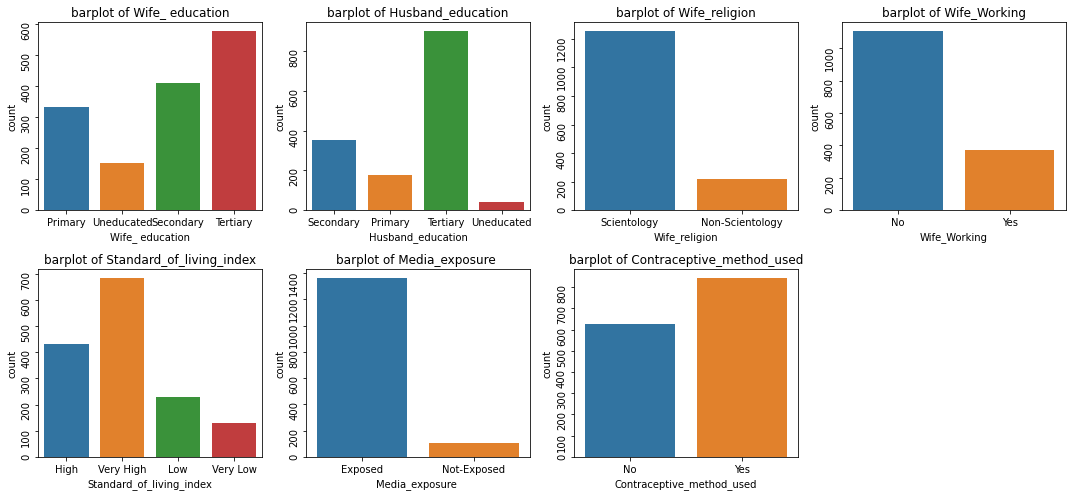

In [231]:
plt.figure(figsize=(15,7))
for i in range(len(cat_col)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df1[cat_col[i]])
    plt.title('barplot of {}'.format(cat_col[i]))
    plt.yticks(rotation=90)
    plt.tight_layout()

In [232]:
df1.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

<AxesSubplot:xlabel='No_of_children_born', ylabel='Wife_age'>

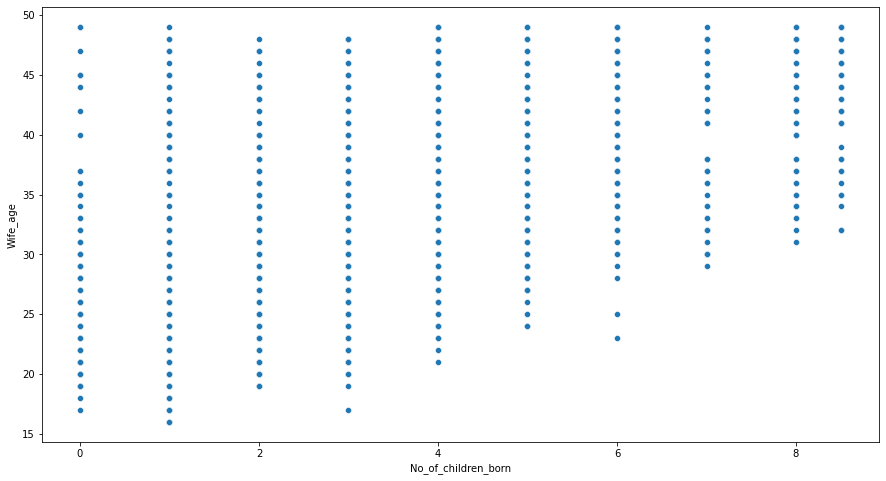

In [233]:
sns.scatterplot(x=df1['No_of_children_born'],y=df1['Wife_age'])

Text(0.5, 1.0, 'Standard_of_living_index vs Husband_Occupation')

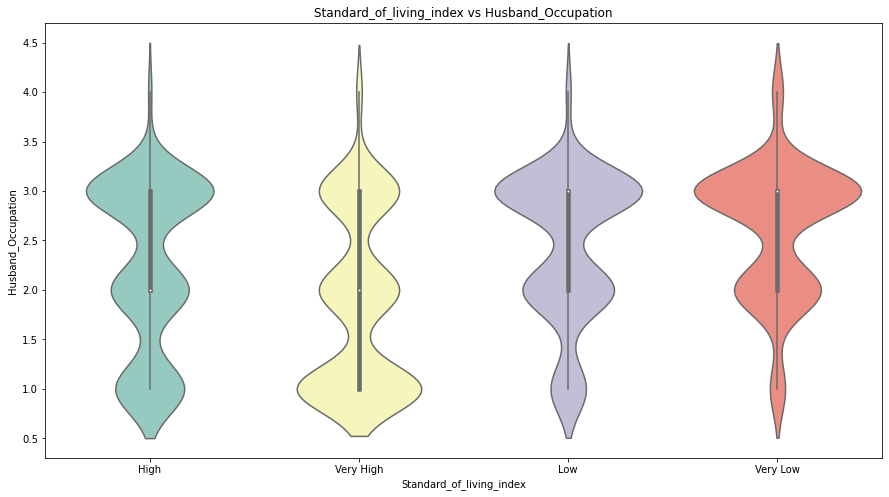

In [235]:
sns.violinplot(x=df1['Standard_of_living_index'],y=df1['Husband_Occupation'],palette="Set3")
plt.title('Standard_of_living_index vs Husband_Occupation')

Text(0.5, 1.0, 'Contraceptive_method_used vs Standard_of_living_index')

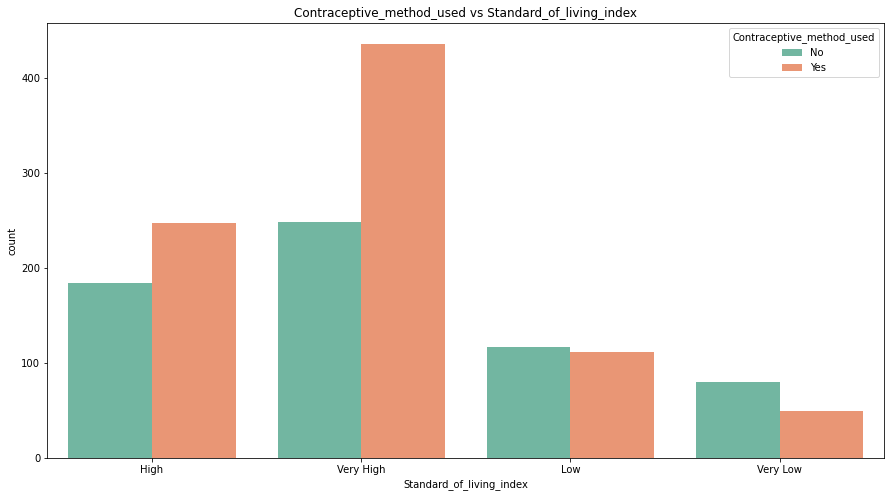

In [236]:
sns.countplot(hue=df1['Contraceptive_method_used'],x=df1['Standard_of_living_index'],palette="Set2")
plt.title('Contraceptive_method_used vs Standard_of_living_index')

Text(0.5, 1.0, 'Standard_of_living_index vs Husband_education')

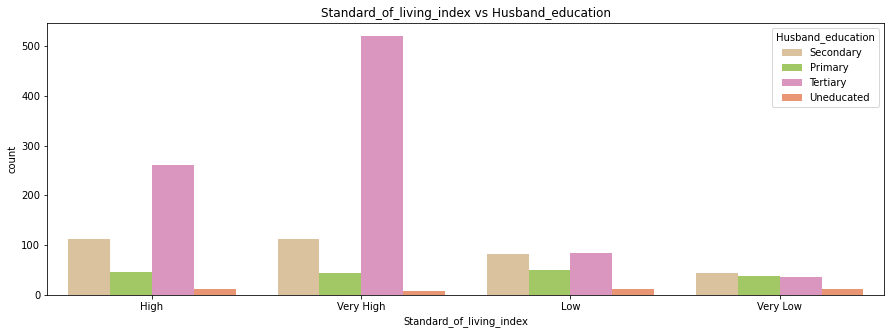

In [237]:
plt.figure(figsize=(15,5))
sns.countplot(x=df1['Standard_of_living_index'],hue=df1['Husband_education'],palette="Set2_r")
plt.title('Standard_of_living_index vs Husband_education')

In [238]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   float64
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(3), object(7)
memory usage: 115.2+ KB


Text(0.5, 1.0, 'No_of_children_born vs Contraceptive_method_used')

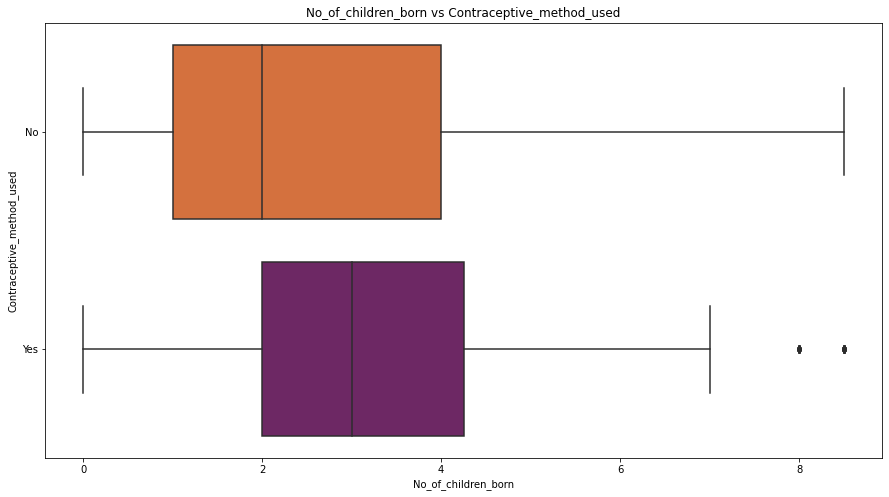

In [240]:
sns.boxplot(x=df1['No_of_children_born'],y=df1['Contraceptive_method_used'],palette="inferno_r")
plt.title('No_of_children_born vs Contraceptive_method_used')

Text(0.5, 1.0, 'Contraceptive_method_used vs Standard_of_living_index')

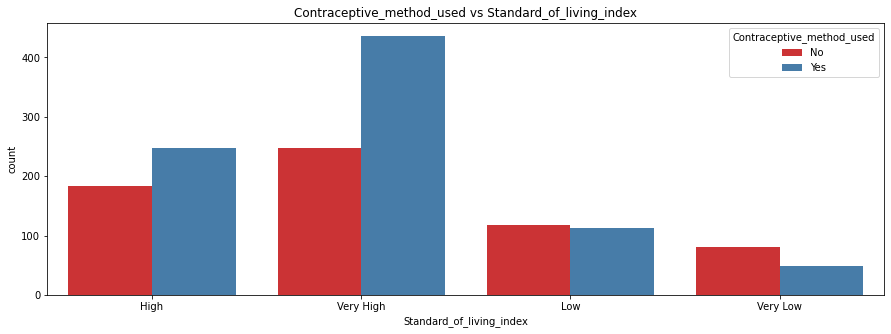

In [241]:
plt.figure(figsize=(15,5))
sns.countplot(hue=df1['Contraceptive_method_used'],x=df1['Standard_of_living_index'],palette="Set1")
plt.title('Contraceptive_method_used vs Standard_of_living_index')


Text(0.5, 1.0, 'Contraceptive_method_used vs Wife_Working')

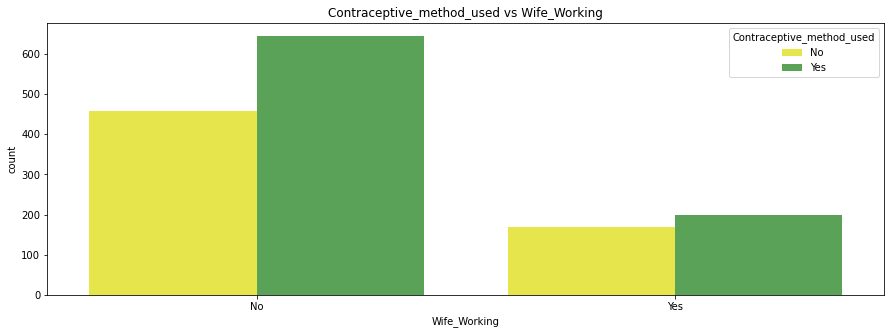

In [242]:
plt.figure(figsize=(15,5))
sns.countplot(hue=df1['Contraceptive_method_used'],x=df1['Wife_Working'],palette="Set1_r")
plt.title('Contraceptive_method_used vs Wife_Working')


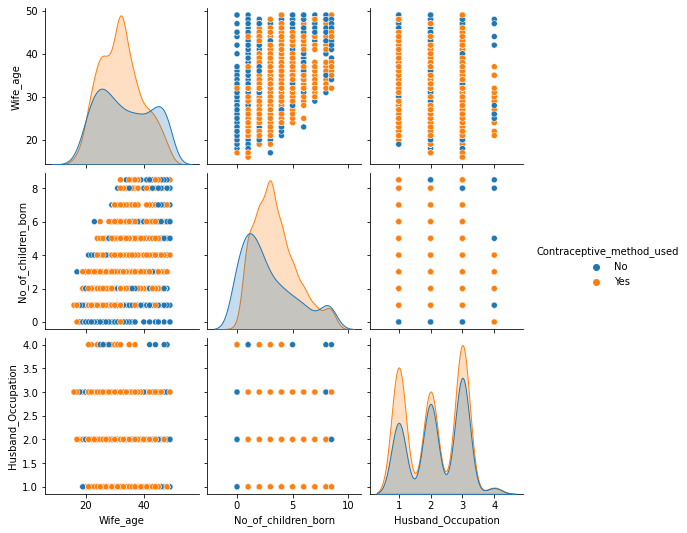

In [243]:
sns.pairplot(df1 , hue='Contraceptive_method_used', diag_kind = 'kde')


In [ ]:
df1[~df1.applymap(np.isreal).all(1)]

In [244]:
cat_col = df1.select_dtypes(include=['object']).columns

In [245]:
df1= pd.get_dummies(df1,columns=cat_col,drop_first=True)

In [246]:
df1.tail()

Wife_age  No_of_children_born  Husband_Occupation  \
1468      33.0                  3.0                 2.0   
1469      33.0                  3.0                 1.0   
1470      39.0                  3.0                 1.0   
1471      33.0                  3.0                 2.0   
1472      17.0                  1.0                 2.0   

      Wife_ education_Secondary  Wife_ education_Tertiary  \
1468                          0                         1   
1469                          0                         1   
1470                          1                         0   
1471                          1                         0   
1472                          1                         0   

      Wife_ education_Uneducated  Husband_education_Secondary  \
1468                           0                            0   
1469                           0                            0   
1470                           0                            1   
1471                           0                            1   
1472                           0                            1   

      Husband_education_Tertiary  Husband_education_Uneducated  \
1468                           1                             0   
1469                           1                             0   
1470                           0                             0   
1471                           0                             0   
1472                           0                             0   

      Wife_religion_Scientology  Wife_Working_Yes  \
1468                          1                 1   
1469                          1                 0   
1470                          1                 1   
1471                          1                 1   
1472                          1                 0   

      Standard_of_living_index_Low  Standard_of_living_index_Very High  \
1468                             0                                   1   
1469                             0                                   1   
1470                             0                                   1   
1471                             1                                   0   
1472                             0                                   1   

      Standard_of_living_index_Very Low  Media_exposure _Not-Exposed  \
1468                                  0                            0   
1469                                  0                            0   
1470                                  0                            0   
1471                                  0                            0   
1472                                  0                            0   

      Contraceptive_method_used_Yes  
1468                              1  
1469                              1  
1470                              1  
1471                              1  
1472                              1

In [247]:
df1.shape

(1473, 16)

## LOGISTIC REGRESSION

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
array = df1.values

In [250]:
x=array[:,0:15]

In [251]:
y=array[:,15]

In [252]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [253]:
type(X_train)

numpy.ndarray

In [254]:
from sklearn.linear_model import LogisticRegression

In [255]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Classification report for training data

In [256]:
print(model_score)
y1_predict = model.predict(X_train)
print(metrics.confusion_matrix(y_train, y1_predict))
print(metrics.classification_report(y_train, y1_predict))

0.6493212669683258
[[218 214]
 [103 496]]
              precision    recall  f1-score   support

         0.0       0.68      0.50      0.58       432
         1.0       0.70      0.83      0.76       599

    accuracy                           0.69      1031
   macro avg       0.69      0.67      0.67      1031
weighted avg       0.69      0.69      0.68      1031



### Classification report for test data

In [257]:
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.6493212669683258
[[ 89 108]
 [ 47 198]]
              precision    recall  f1-score   support

         0.0       0.65      0.45      0.53       197
         1.0       0.65      0.81      0.72       245

    accuracy                           0.65       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.65      0.64       442



### Confusion matric training data

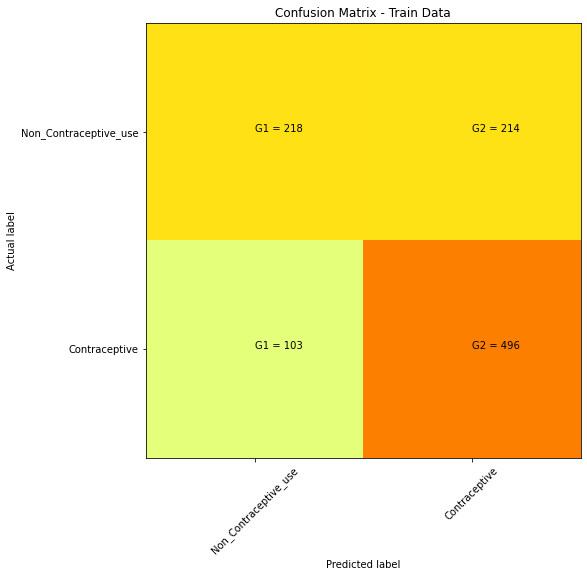

In [260]:
cm = metrics.confusion_matrix(y_train, y1_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_Contraceptive_use', 'Contraceptive']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Confusion matrix for test data

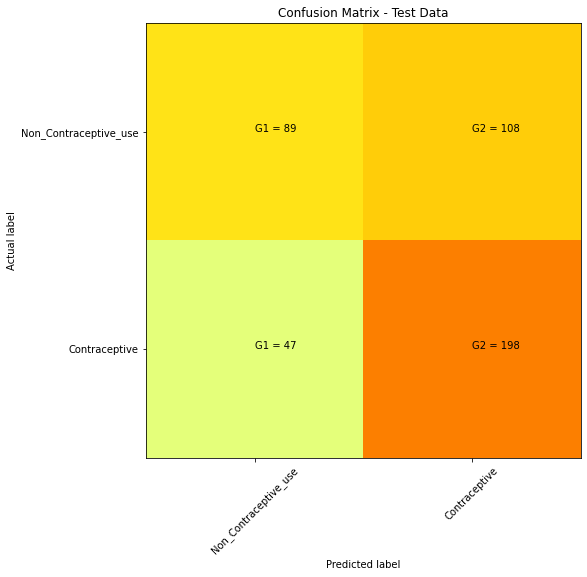

In [261]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_Contraceptive_use', 'Contraceptive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## LDA MODEL

In [262]:
df1.head()

Wife_age  No_of_children_born  Husband_Occupation  \
0      24.0                  3.0                 2.0   
1      45.0                  8.5                 3.0   
2      43.0                  7.0                 3.0   
3      42.0                  8.5                 3.0   
4      36.0                  8.0                 3.0   

   Wife_ education_Secondary  Wife_ education_Tertiary  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          1                         0   
4                          1                         0   

   Wife_ education_Uneducated  Husband_education_Secondary  \
0                           0                            1   
1                           1                            1   
2                           0                            1   
3                           0                            0   
4                           0                            1   

   Husband_education_Tertiary  Husband_education_Uneducated  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Wife_religion_Scientology  Wife_Working_Yes  Standard_of_living_index_Low  \
0                          1                 0                             0   
1                          1                 0                             0   
2                          1                 0                             0   
3                          1                 0                             0   
4                          1                 0                             1   

   Standard_of_living_index_Very High  Standard_of_living_index_Very Low  \
0                                   0                                  0   
1                                   1                                  0   
2                                   1                                  0   
3                                   0                                  0   
4                                   0                                  0   

   Media_exposure _Not-Exposed  Contraceptive_method_used_Yes  
0                            0                              0  
1                            0                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0

In [263]:
x=df1.drop('Contraceptive_method_used_Yes',axis=1)

In [264]:
y=df1['Contraceptive_method_used_Yes']

In [265]:
X1_train,X1_test, y1_train,y1_test = train_test_split(x,y,test_size=0.3,random_state=101) 

In [266]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
clf = LinearDiscriminantAnalysis()
model=clf.fit(X1_train,y1_train)

### Intercept of LDA

In [267]:
clf.intercept_

array([1.57889506])

In [280]:
X1_train.columns[1]

'No_of_children_born'

### Coeficients of LDA

In [279]:
clf.coef_

array([[-0.08935853,  0.38082614,  0.09030706,  0.6349701 ,  1.54470159,
        -0.3754929 ,  0.17097053, -0.14116475, -0.38729069, -0.46933499,
        -0.12916726, -0.03764121,  0.29537192, -0.39828833, -0.25029414]])

In [282]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[0][idx]))

The coefficient for Wife_age is -0.08935853494596942
The coefficient for No_of_children_born is 0.38082614077699967
The coefficient for Husband_Occupation is 0.09030705841213207
The coefficient for Wife_ education_Secondary is 0.6349700985239175
The coefficient for Wife_ education_Tertiary is 1.5447015885975102
The coefficient for Wife_ education_Uneducated is -0.37549289911044353
The coefficient for Husband_education_Secondary is 0.17097052569898155
The coefficient for Husband_education_Tertiary is -0.14116474811655413
The coefficient for Husband_education_Uneducated is -0.38729068967943925
The coefficient for Wife_religion_Scientology is -0.4693349895134453
The coefficient for Wife_Working_Yes is -0.12916726253578895
The coefficient for Standard_of_living_index_Low is -0.037641209549918925
The coefficient for Standard_of_living_index_Very High is 0.2953719197526195
The coefficient for Standard_of_living_index_Very Low is -0.39828832728498614
The coefficient for Media_exposure _Not-Ex

In [269]:
X1_train.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_ education_Secondary', 'Wife_ education_Tertiary',
       'Wife_ education_Uneducated', 'Husband_education_Secondary',
       'Husband_education_Tertiary', 'Husband_education_Uneducated',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Standard_of_living_index_Low', 'Standard_of_living_index_Very High',
       'Standard_of_living_index_Very Low', 'Media_exposure _Not-Exposed'],
      dtype='object')

In [270]:
print('Contraceptive_method_used = ')
for i in range(len(X1_train.columns)):
    print('{} x {} +'.format(round(clf.coef_[0][i],2),X1_train.columns[i]),end=" ")

Contraceptive_method_used = 
-0.09 x Wife_age + 0.38 x No_of_children_born + 0.09 x Husband_Occupation + 0.63 x Wife_ education_Secondary + 1.54 x Wife_ education_Tertiary + -0.38 x Wife_ education_Uneducated + 0.17 x Husband_education_Secondary + -0.14 x Husband_education_Tertiary + -0.39 x Husband_education_Uneducated + -0.47 x Wife_religion_Scientology + -0.13 x Wife_Working_Yes + -0.04 x Standard_of_living_index_Low + 0.3 x Standard_of_living_index_Very High + -0.4 x Standard_of_living_index_Very Low + -0.25 x Media_exposure _Not-Exposed + 

### Linear Discriminate Analysis equation:
Contraceptive_method_used = -0.09 x Wife_age + 0.38 x No_of_children_born + 0.09 x Husband_Occupation + 0.63 x Wife_ education_Secondary + 1.54 x Wife_ education_Tertiary + -0.38 x Wife_ education_Uneducated + 0.17 x Husband_education_Secondary + -0.14 x Husband_education_Tertiary + -0.39 x Husband_education_Uneducated + -0.47 x Wife_religion_Scientology + -0.13 x Wife_Working_Yes + -0.04 x Standard_of_living_index_Low + 0.3 x Standard_of_living_index_Very High + -0.4 x Standard_of_living_index_Very Low + -0.25 x Media_exposure _Not-Exposed 


**By the above equation and the coefficients it is clear that**
* predictor Wife_ education_Tertiary has the largest magnitude, thus this helps in classifying the best.
* predictor Wife_religion_Scientology has the smallest magnitude, thus this helps in classifying the least.

### Confusion Matrix

In [283]:
pred_class_train = model.predict(X1_train)
pred_class_test = model.predict(X1_test)

CONFUSION MATRIX:


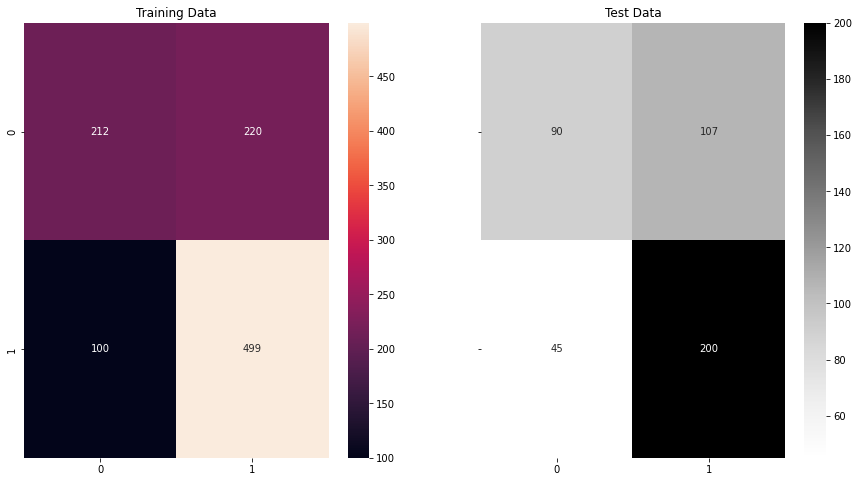

In [284]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
print('CONFUSION MATRIX:')

plot_0 = sns.heatmap((metrics.confusion_matrix(y1_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y1_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Classification Report of the training data

In [285]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y1_train,pred_class_train),'\n')


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.68      0.49      0.57       432
           1       0.69      0.83      0.76       599

    accuracy                           0.69      1031
   macro avg       0.69      0.66      0.66      1031
weighted avg       0.69      0.69      0.68      1031
 



### Classification Report of the test data

In [286]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y1_test,pred_class_test),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.46      0.54       197
           1       0.65      0.82      0.72       245

    accuracy                           0.66       442
   macro avg       0.66      0.64      0.63       442
weighted avg       0.66      0.66      0.64       442
 



### AUC and ROC

In [287]:
pred_prob_train = model.predict_proba(X1_train)
pred_prob_test = model.predict_proba(X1_test)

AUC for the Training Data: 0.723
AUC for the Test Data: 0.705


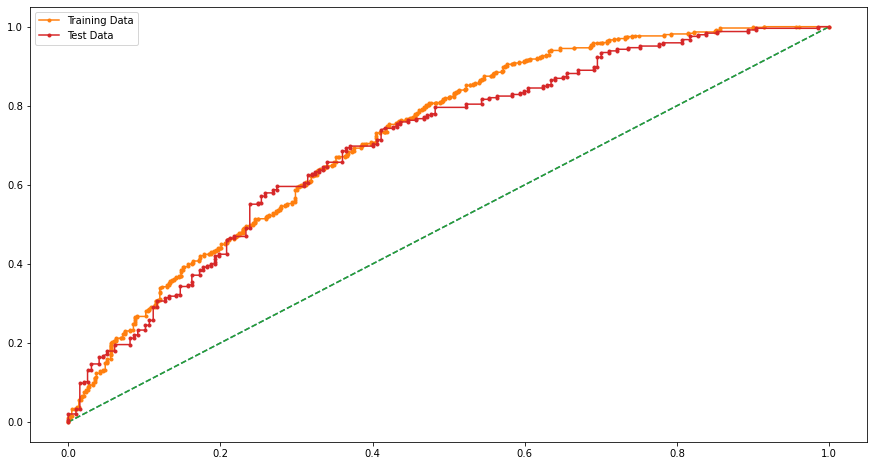

In [288]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## CART 

In [289]:
from sklearn.tree import DecisionTreeClassifier

In [290]:
X2_train,X2_test, y2_train,y2_test = train_test_split(x,y,test_size=0.3,random_state=101) 

In [291]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [292]:
dt_model.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=1)

In [293]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X2_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


In [294]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X2_train.columns).sort_values('Imp',ascending=False))

                                         Imp
Wife_age                            0.313043
No_of_children_born                 0.247081
Wife_ education_Tertiary            0.079041
Husband_Occupation                  0.078255
Standard_of_living_index_Very High  0.049544
Wife_Working_Yes                    0.040193
Standard_of_living_index_Low        0.033109
Husband_education_Tertiary          0.031088
Standard_of_living_index_Very Low   0.028611
Wife_religion_Scientology           0.026329
Wife_ education_Secondary           0.021614
Husband_education_Secondary         0.019466
Wife_ education_Uneducated          0.017043
Media_exposure _Not-Exposed         0.009989
Husband_education_Uneducated        0.005595


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


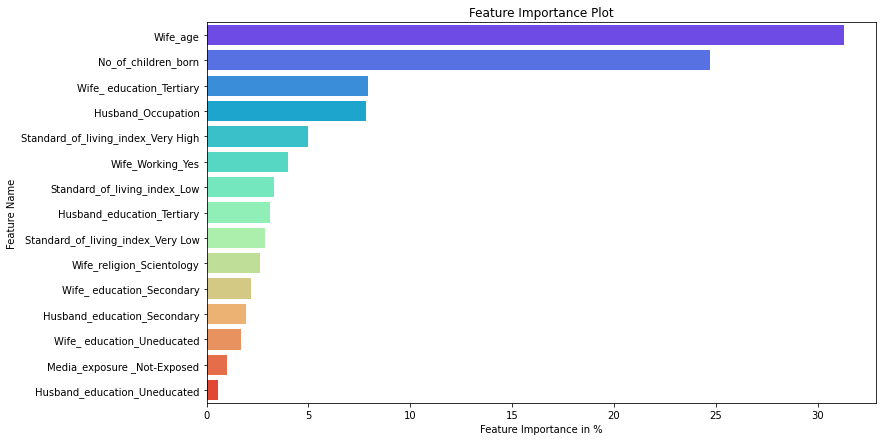

In [296]:
x=pd.DataFrame(dt_model.feature_importances_*100,index=X2_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [322]:
y_predict = dt_model.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [323]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=50,min_samples_split=100,random_state=1)
reg_dt_model.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=50, min_samples_split=100,
                       random_state=1)

In [324]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X2_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [325]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X2_train.columns).sort_values('Imp',ascending=False))

                                         Imp
No_of_children_born                 0.435702
Wife_ education_Tertiary            0.263276
Wife_age                            0.203375
Wife_ education_Uneducated          0.037734
Wife_ education_Secondary           0.028732
Wife_Working_Yes                    0.012235
Husband_Occupation                  0.010971
Husband_education_Tertiary          0.007976
Husband_education_Secondary         0.000000
Husband_education_Uneducated        0.000000
Wife_religion_Scientology           0.000000
Standard_of_living_index_Low        0.000000
Standard_of_living_index_Very High  0.000000
Standard_of_living_index_Very Low   0.000000
Media_exposure _Not-Exposed         0.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


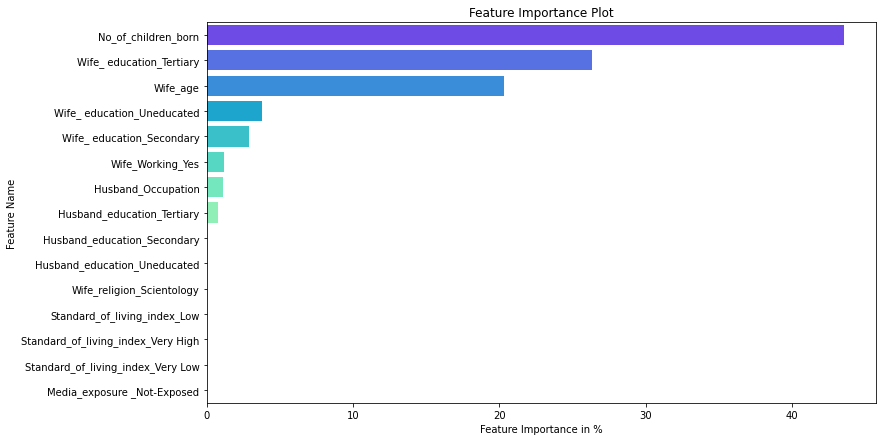

In [302]:
x=pd.DataFrame(reg_dt_model.feature_importances_*100,index=X2_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [326]:
ytrain_predict = reg_dt_model.predict(X2_train)
ytest_predict = reg_dt_model.predict(X2_test)

In [304]:
ytest_predict

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [305]:
ytest_predict_prob=reg_dt_model.predict_proba(X2_test)
ytest_predict_prob

array([[0.15      , 0.85      ],
       [0.36538462, 0.63461538],
       [0.37037037, 0.62962963],
       [0.37179487, 0.62820513],
       [0.58181818, 0.41818182],
       [0.55421687, 0.44578313],
       [0.37179487, 0.62820513],
       [0.15      , 0.85      ],
       [0.36538462, 0.63461538],
       [0.18518519, 0.81481481],
       [0.15      , 0.85      ],
       [0.71929825, 0.28070175],
       [0.36538462, 0.63461538],
       [0.29411765, 0.70588235],
       [0.29411765, 0.70588235],
       [0.71929825, 0.28070175],
       [0.18309859, 0.81690141],
       [0.71929825, 0.28070175],
       [0.98550725, 0.01449275],
       [0.18309859, 0.81690141],
       [0.55421687, 0.44578313],
       [0.37179487, 0.62820513],
       [0.29411765, 0.70588235],
       [0.18309859, 0.81690141],
       [0.29411765, 0.70588235],
       [0.23287671, 0.76712329],
       [0.18518519, 0.81481481],
       [0.18518519, 0.81481481],
       [0.36538462, 0.63461538],
       [0.29411765, 0.70588235],
       [0.

In [327]:
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.150000  0.850000
1  0.365385  0.634615
2  0.370370  0.629630
3  0.371795  0.628205
4  0.581818  0.418182

## Measuring AUC-ROC Curve

AUC: 0.782


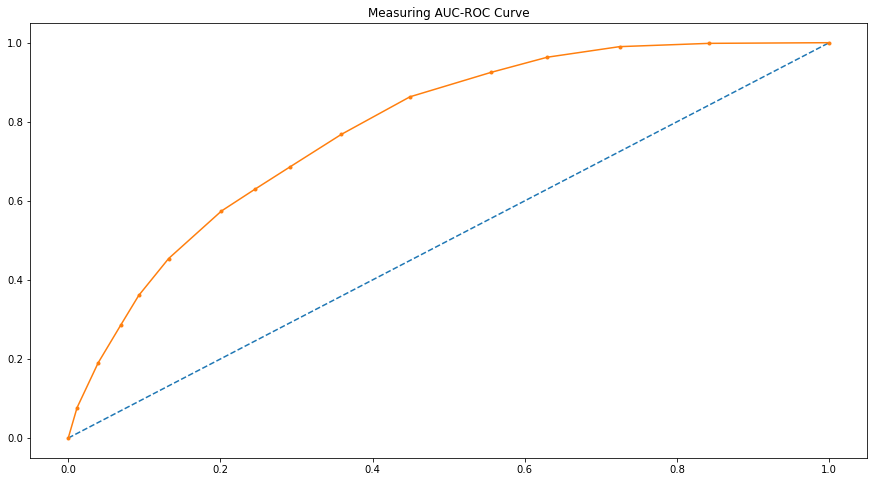

In [329]:
# predict probabilities
probs = reg_dt_model.predict_proba(X2_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y2_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Measuring AUC-ROC Curve for training data')
# show the plot
plt.show()

AUC: 0.736


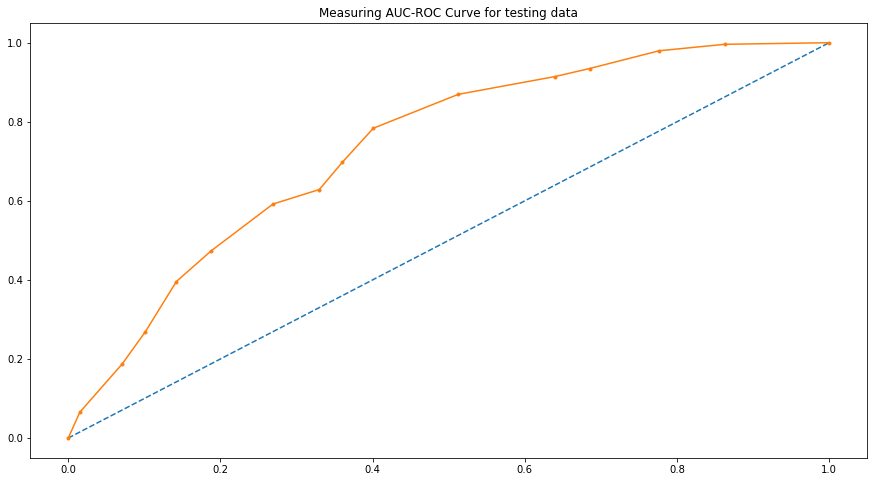

In [330]:
# predict probabilities
probs = reg_dt_model.predict_proba(X2_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y2_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Measuring AUC-ROC Curve for testing data')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [309]:
from sklearn.metrics import classification_report,confusion_matrix

In [315]:
confusion_matrix(y2_train, ytrain_predict)

array([[238, 194],
       [ 82, 517]], dtype=int64)

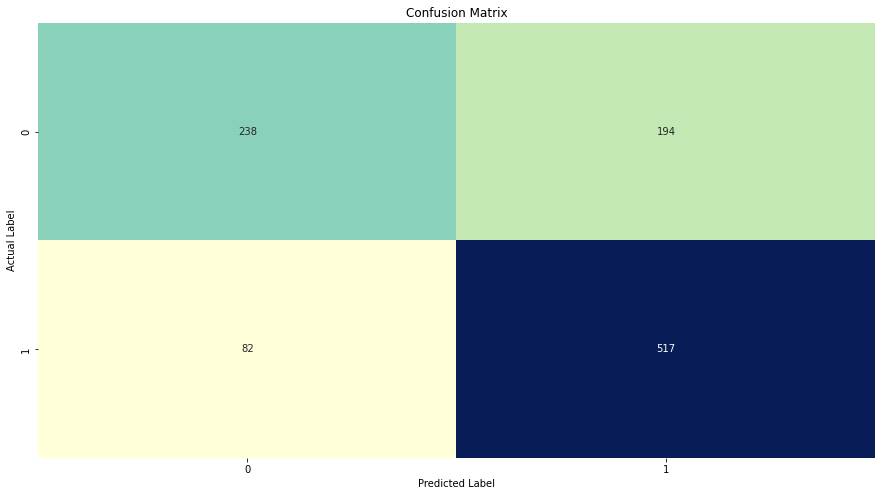

In [316]:
sns.heatmap(confusion_matrix(y2_train,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [311]:
reg_dt_model.score(X2_train,y2_train) #train data accuracy

0.7322987390882638

In [312]:
print((238+517)/(238+194+82+517))

0.7322987390882638


In [313]:
print(classification_report(y2_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.55      0.63       432
           1       0.73      0.86      0.79       599

    accuracy                           0.73      1031
   macro avg       0.74      0.71      0.71      1031
weighted avg       0.73      0.73      0.72      1031



## Confusion Matrix for test data

In [318]:
confusion_matrix(y2_test, ytest_predict)

array([[ 96, 101],
       [ 32, 213]], dtype=int64)

In [319]:
reg_dt_model.score(X_test,y2_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6990950226244343

In [320]:
print(classification_report(y2_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.49      0.59       197
           1       0.68      0.87      0.76       245

    accuracy                           0.70       442
   macro avg       0.71      0.68      0.68       442
weighted avg       0.71      0.70      0.69       442



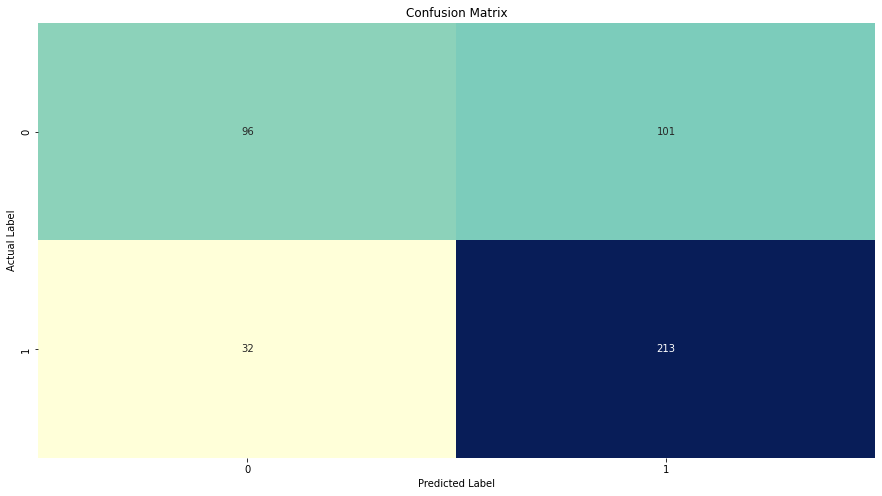

In [321]:
sns.heatmap(confusion_matrix(y2_test,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()